<a href="https://colab.research.google.com/github/Florani1/Hamoye-Projects/blob/main/Food_production%26supply_tagalong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic : Solving the World Food Shortage Problem

Quiz Solution

1. Algeria produced the highest amount of oats

In [ ]:
oats_2010 = df[(df['Year'] == 2010) & (df['Item'] == 'Oats')]

# Find the country with the highest oat production in 2010
highest_oats_producer = oats_2010.loc[oats_2010['Value'].idxmax(), 'Country']

print("Country with the highest oat production in 2010:", highest_oats_producer)

Country with the highest oat production in 2010: Algeria


14. Which African country is identified as having the most unique set of agricultural products distinct from other countries?

In [ ]:
unique_products_per_country = df.groupby('Country')['Item'].nunique().reset_index()
unique_products_per_country

Country  Item
0                       Algeria    58
1                        Angola    54
2                         Benin    59
3                      Botswana    34
4                  Burkina Faso    43
5                    Cabo Verde    33
6                      Cameroon    65
7      Central African Republic    45
8                          Chad    39
9                         Congo    50
10                Cote d'Ivoire    64
11                     Djibouti    22
12                        Egypt    70
13                     Ethiopia    60
14                        Gabon    40
15                       Gambia    36
16                        Ghana    58
17                       Guinea    50
18                Guinea-Bissau    44
19                        Kenya    75
20                      Lesotho    23
21                      Liberia    42
22                   Madagascar    69
23                       Malawi    48
24                         Mali    48
25                   Mauritania    38
26                    Mauritius    46
27                      Morocco    77
28                   Mozambique    62
29                      Namibia    43
30                        Niger    43
31                      Nigeria    61
32                       Rwanda    46
33        Sao Tome and Principe    29
34                      Senegal    52
35                 Sierra Leone    50
36                 South Africa    75
37                        Sudan    55
38                    Swaziland    42
39                         Togo    56
40                      Tunisia    61
41                       Uganda    56
42  United Republic of Tanzania    79
43                       Zambia    48
44                     Zimbabwe    64

## Outline


*   Introduction
*   Objective
*   Food Production Analysis
*   Food Supply Analysis
*   Test of Hypothesis
*   Conclusion







## Introduction
Understanding the dynamics of food production and supply is crucial for ensuring sustainable agriculture and addressing issues related to food security. In this analysis, I delved into a comprehensive dataset to examine key trends and patterns in the value of food production and supply across different countries in Africa.



### Objective
Using Python as the programming language for data analysis and visualisations, this project aims to tell a story of how the world food shortage problem can be solved using different visuals.

Inorder to get insights from this dataset, the following questions will be answered:


# Food Production Analysis



# Importing the necessary libraries and uploading the dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = pd.read_csv('/content/Africa Food Production (2004 - 2013).csv')

## Data Info

In [ ]:
df

Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]

In [ ]:
df.columns

Index(['Country', 'Item', 'Year', 'Value'], dtype='object')

In [ ]:
df.describe()

Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


### Data Cleaning

I wil use the datetime module for working with dates and the pint library for handling quantities. First, you'll need to install the pint library if you haven't already:

The pint library is used to handle quantities. The ureg.kiloton represents the unit of kilotons.
The to_kiloton function takes a numerical value v and returns a quantity in kilotons.
The to_date_object function takes a numerical value y and returns a datetime object representing the year.

In [ ]:
pip install pint

In [ ]:
def to_kiloton(v):
    return v * 1000

In [ ]:
from datetime import datetime
from pint import UnitRegistry

# Create a unit registry
ureg = UnitRegistry()

# Function to convert to kilotons
def to_date_object(v):
    return datetime(year=y.year, month=1, day=1)

# Function to convert to DateObject
def to_date_object(y):
    return datetime(year=y, month=1, day=1)

# Examples
kiloton_value = to_kiloton(5)
date_obj_value = to_date_object(2023)

print(kiloton_value)
print(date_obj_value)

5000
2023-01-01 00:00:00


In pandas, the "year" column in a DataFrame containing datetime values is typically a Timestamp object. To extract the year, you can use the .dt accessor. Let's modify the to_date_object function to handle this:


In [ ]:
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

##Insights from the dataset

What is the total value of each Item from 2004-2013

In [ ]:
# group by Country and year to view the total value for each product for different years in different countries
prod = df.groupby(['Country', 'Year'])
prod.first()

Item  Value
Country  Year                           
Algeria  2004  Wheat and products   2731
         2005  Wheat and products   2415
         2006  Wheat and products   2688
         2007  Wheat and products   2319
         2008  Wheat and products   1111
...                           ...    ...
Zimbabwe 2009  Wheat and products     12
         2010  Wheat and products     18
         2011  Wheat and products     23
         2012  Wheat and products     20
         2013  Wheat and products     25

[450 rows x 2 columns]

What is the total value of each product every year in every country

In [ ]:
grouped_df = df.groupby(["Country", "Year", "Item"]).sum().reset_index()
grouped_df

Country  Year                   Item  Value
0       Algeria  2004    Apples and products    165
1       Algeria  2004                Bananas      0
2       Algeria  2004    Barley and products   1212
3       Algeria  2004                  Beans      2
4       Algeria  2004                   Beer    110
...         ...   ...                    ...    ...
23105  Zimbabwe  2013   Tea (including mate)     19
23106  Zimbabwe  2013  Tomatoes and products     24
23107  Zimbabwe  2013      Vegetables, Other    203
23108  Zimbabwe  2013     Wheat and products     25
23109  Zimbabwe  2013                   Wine      2

[23110 rows x 4 columns]

In [ ]:
grouped_df.head(30) # to view the first 30 rows

Country  Year                             Item  Value
0   Algeria  2004              Apples and products    165
1   Algeria  2004                          Bananas      0
2   Algeria  2004              Barley and products   1212
3   Algeria  2004                            Beans      2
4   Algeria  2004                             Beer    110
5   Algeria  2004             Beverages, Alcoholic      0
6   Algeria  2004                      Bovine Meat    125
7   Algeria  2004                     Butter, Ghee      2
8   Algeria  2004                      Cephalopods      1
9   Algeria  2004                   Cereals, Other      0
10  Algeria  2004                    Citrus, Other      0
11  Algeria  2004                       Cottonseed      0
12  Algeria  2004                      Crustaceans      3
13  Algeria  2004                            Dates    443
14  Algeria  2004                    Demersal Fish     10
15  Algeria  2004                             Eggs    180
16  Algeria  2004               Fats, Animals, Raw      7
17  Algeria  2004                  Freshwater Fish      1
18  Algeria  2004                    Fruits, Other    480
19  Algeria  2004          Grapefruit and products      2
20  Algeria  2004  Grapes and products (excl wine)    284
21  Algeria  2004                    Groundnut Oil     19
22  Algeria  2004          Groundnuts (Shelled Eq)      3
23  Algeria  2004                            Honey      3
24  Algeria  2004       Lemons, Limes and products     46
25  Algeria  2004               Maize and products      1
26  Algeria  2004               Marine Fish, Other      0
27  Algeria  2004                      Meat, Other     11
28  Algeria  2004          Milk - Excluding Butter   1701
29  Algeria  2004                  Molluscs, Other      0

What is the total value of Items produced in every country

In [ ]:
total_by_country = df.groupby("Country")["Value"].sum().reset_index()
total_by_country

Country    Value
0                       Algeria   188650
1                        Angola   195499
2                         Benin    88072
3                      Botswana     4808
4                  Burkina Faso   100129
5                    Cabo Verde     1658
6                      Cameroon   197670
7      Central African Republic    24921
8                          Chad    45078
9                         Congo    25791
10                Cote d'Ivoire   182486
11                     Djibouti      666
12                        Egypt   877498
13                     Ethiopia   350693
14                        Gabon    13566
15                       Gambia     4699
16                        Ghana   295004
17                       Guinea    66848
18                Guinea-Bissau     7296
19                        Kenya   256872
20                      Lesotho     3785
21                      Liberia    14657
22                   Madagascar   133071
23                       Malawi   153717
24                         Mali    92292
25                   Mauritania    10039
26                    Mauritius    51785
27                      Morocco   271821
28                   Mozambique   157584
29                      Namibia    14197
30                        Niger    86808
31                      Nigeria  1628030
32                       Rwanda    95174
33        Sao Tome and Principe     1152
34                      Senegal    49414
35                 Sierra Leone    47737
36                 South Africa   579592
37                        Sudan   301584
38                    Swaziland    62665
39                         Togo    32155
40                      Tunisia    92713
41                       Uganda   278421
42  United Republic of Tanzania   332802
43                       Zambia    82701
44                     Zimbabwe    73316

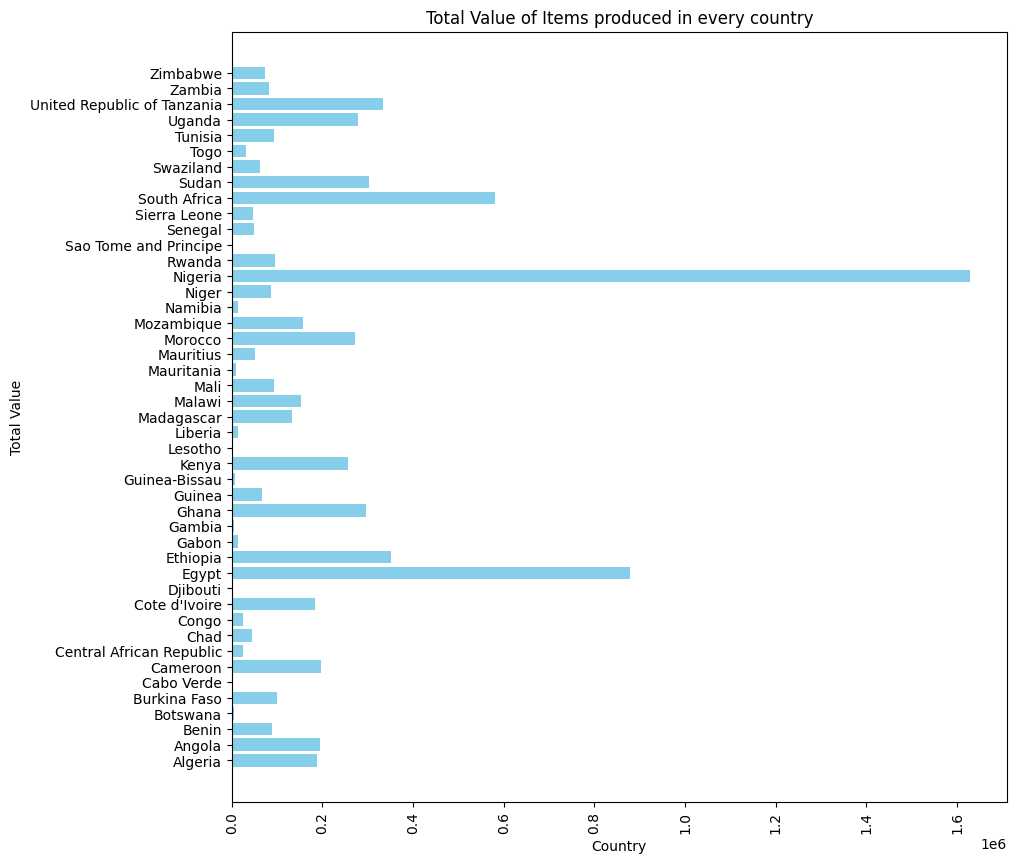

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(total_by_country['Country'], total_by_country['Value'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.title('Total Value of Items produced in every country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The highest value of Items produced

In [ ]:
Max_Value = max(df['Value'])
Max_Value

54000

Which country has this highest value

In [ ]:
max_value_country = df.loc[df['Value'].idxmax(), 'Country']
print("Country with the highest value:", max_value_country)

Country with the highest value: Nigeria


Which Item has this highest value

In [ ]:
max_value_item = df.loc[df['Value'].idxmax(), 'Item']
print("Item with the highest value:", max_value_item)

Item with the highest value: Cassava and products


Bar Chart of the Item with the highest value in comparison with other items

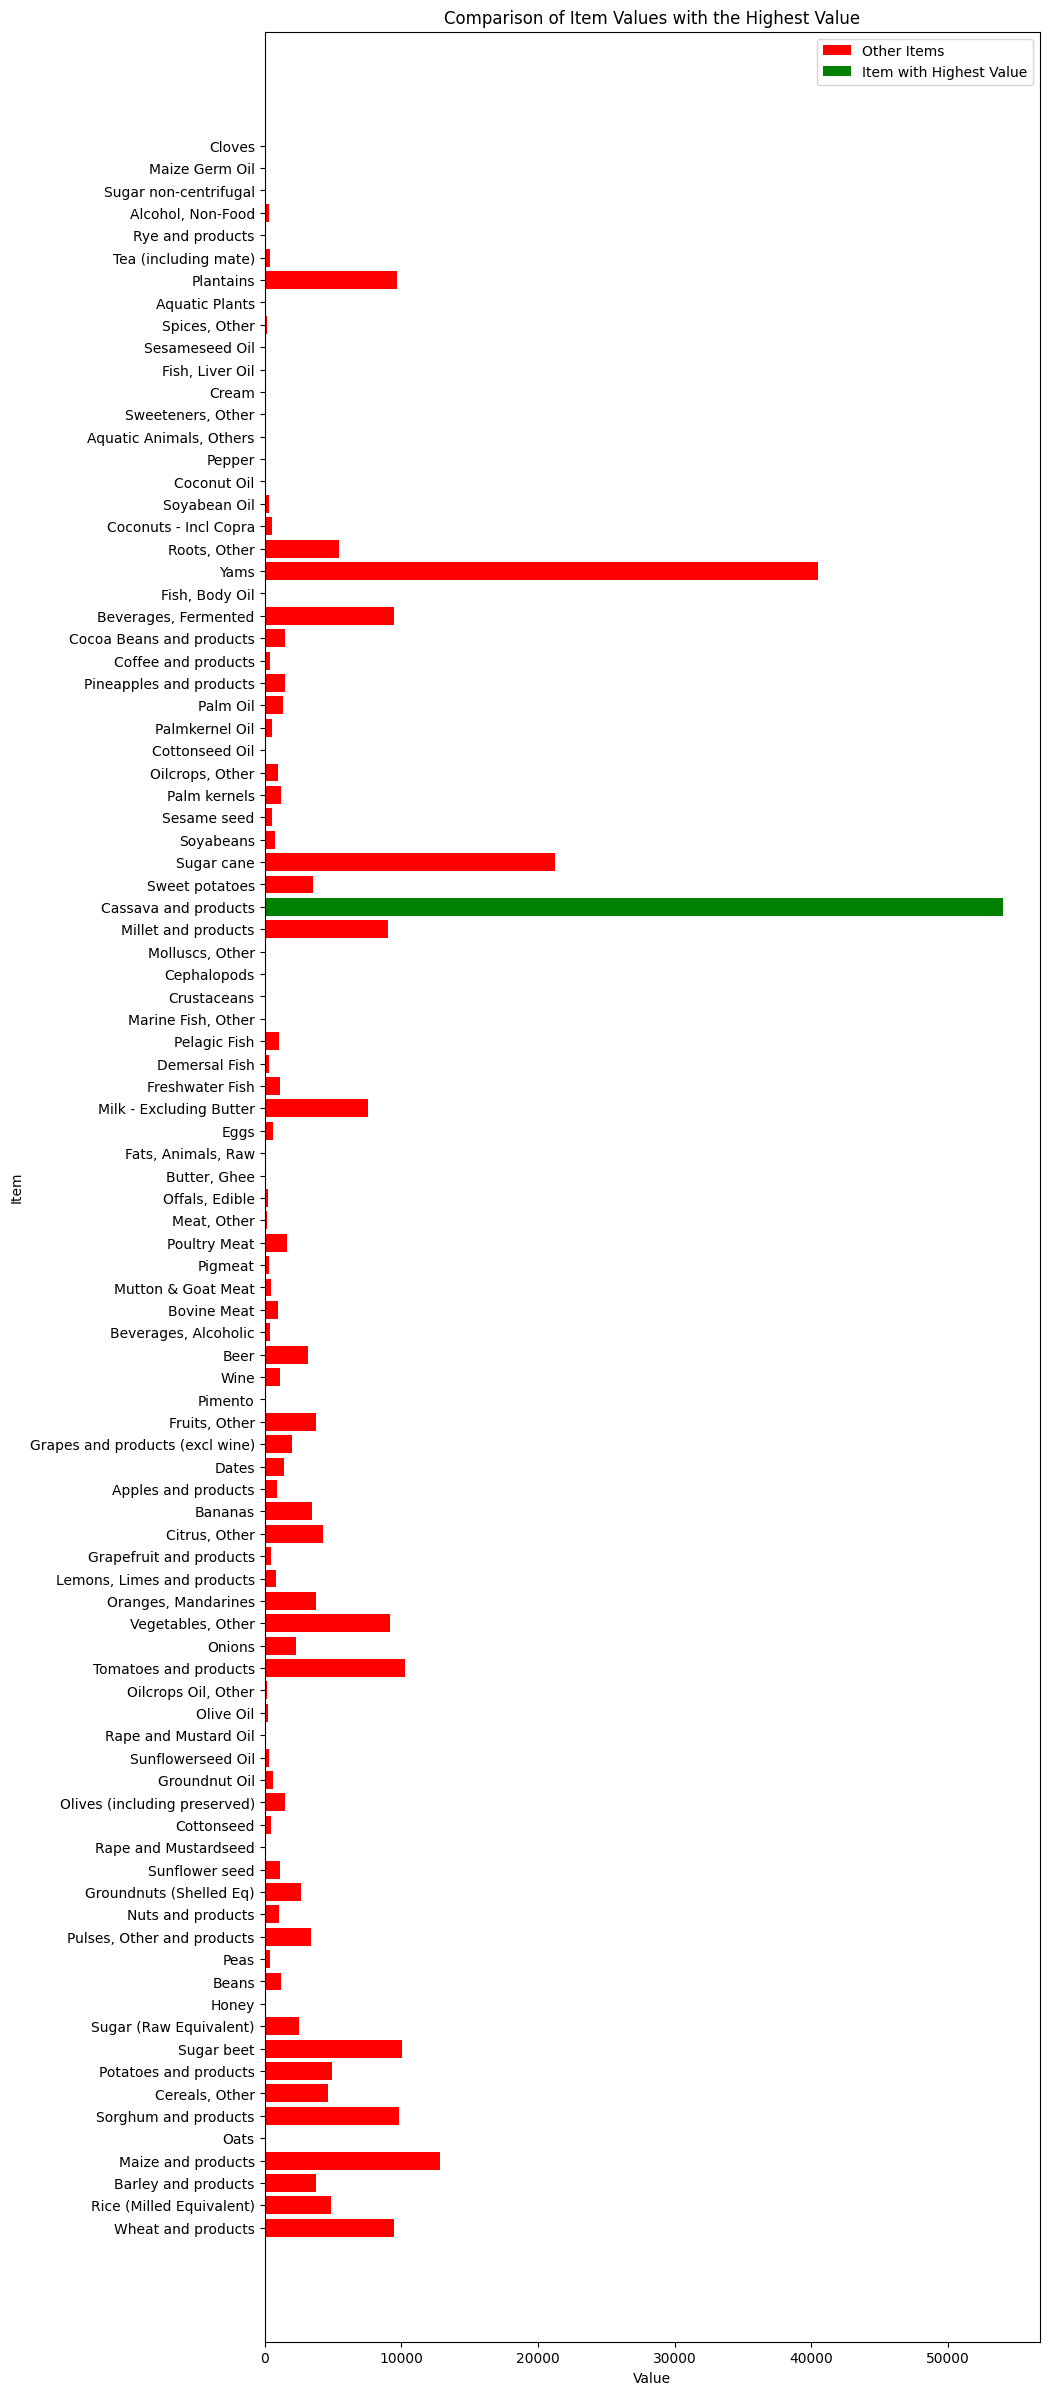

In [ ]:
max_value_item = df.loc[df['Value'].idxmax(), 'Item']
max_value = df['Value'].max()

plt.figure(figsize=(10, 30))

# Plot bars for all items
plt.barh(df['Item'], df['Value'], color='red', label='Other Items')
# Highlight the bar for the item with the highest value
plt.barh(max_value_item, max_value, color='green', label='Item with Highest Value')

plt.xlabel('Value')
plt.ylabel('Item')
plt.title('Comparison of Item Values with the Highest Value')
plt.legend()
plt.show()

Products with the highest value in descending order

In [ ]:
grouped_df_sort = grouped_df.sort_values(by = "Value", ascending = False).reset_index()
grouped_df_sort

index     Country  Year                  Item  Value
0      15872     Nigeria  2012  Cassava and products  54000
1      15933     Nigeria  2013  Cassava and products  53000
2      15811     Nigeria  2011  Cassava and products  52403
3      15506     Nigeria  2006  Cassava and products  45721
4      15628     Nigeria  2008  Cassava and products  44582
...      ...         ...   ...                   ...    ...
23105  15251       Niger  2011        Aquatic Plants      0
23106   2786  Cabo Verde  2013           Crustaceans      0
23107   2785  Cabo Verde  2013   Coffee and products      0
23108   8453      Guinea  2007          Butter, Ghee      0
23109   2624  Cabo Verde  2008    Fats, Animals, Raw      0

[23110 rows x 5 columns]

Products with the least values are:

*   Fats,Animals,Raw
*   Butter,Ghee
*   Coffee and products
*   Crustaceans
*   Aquatic Plants







(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000')])

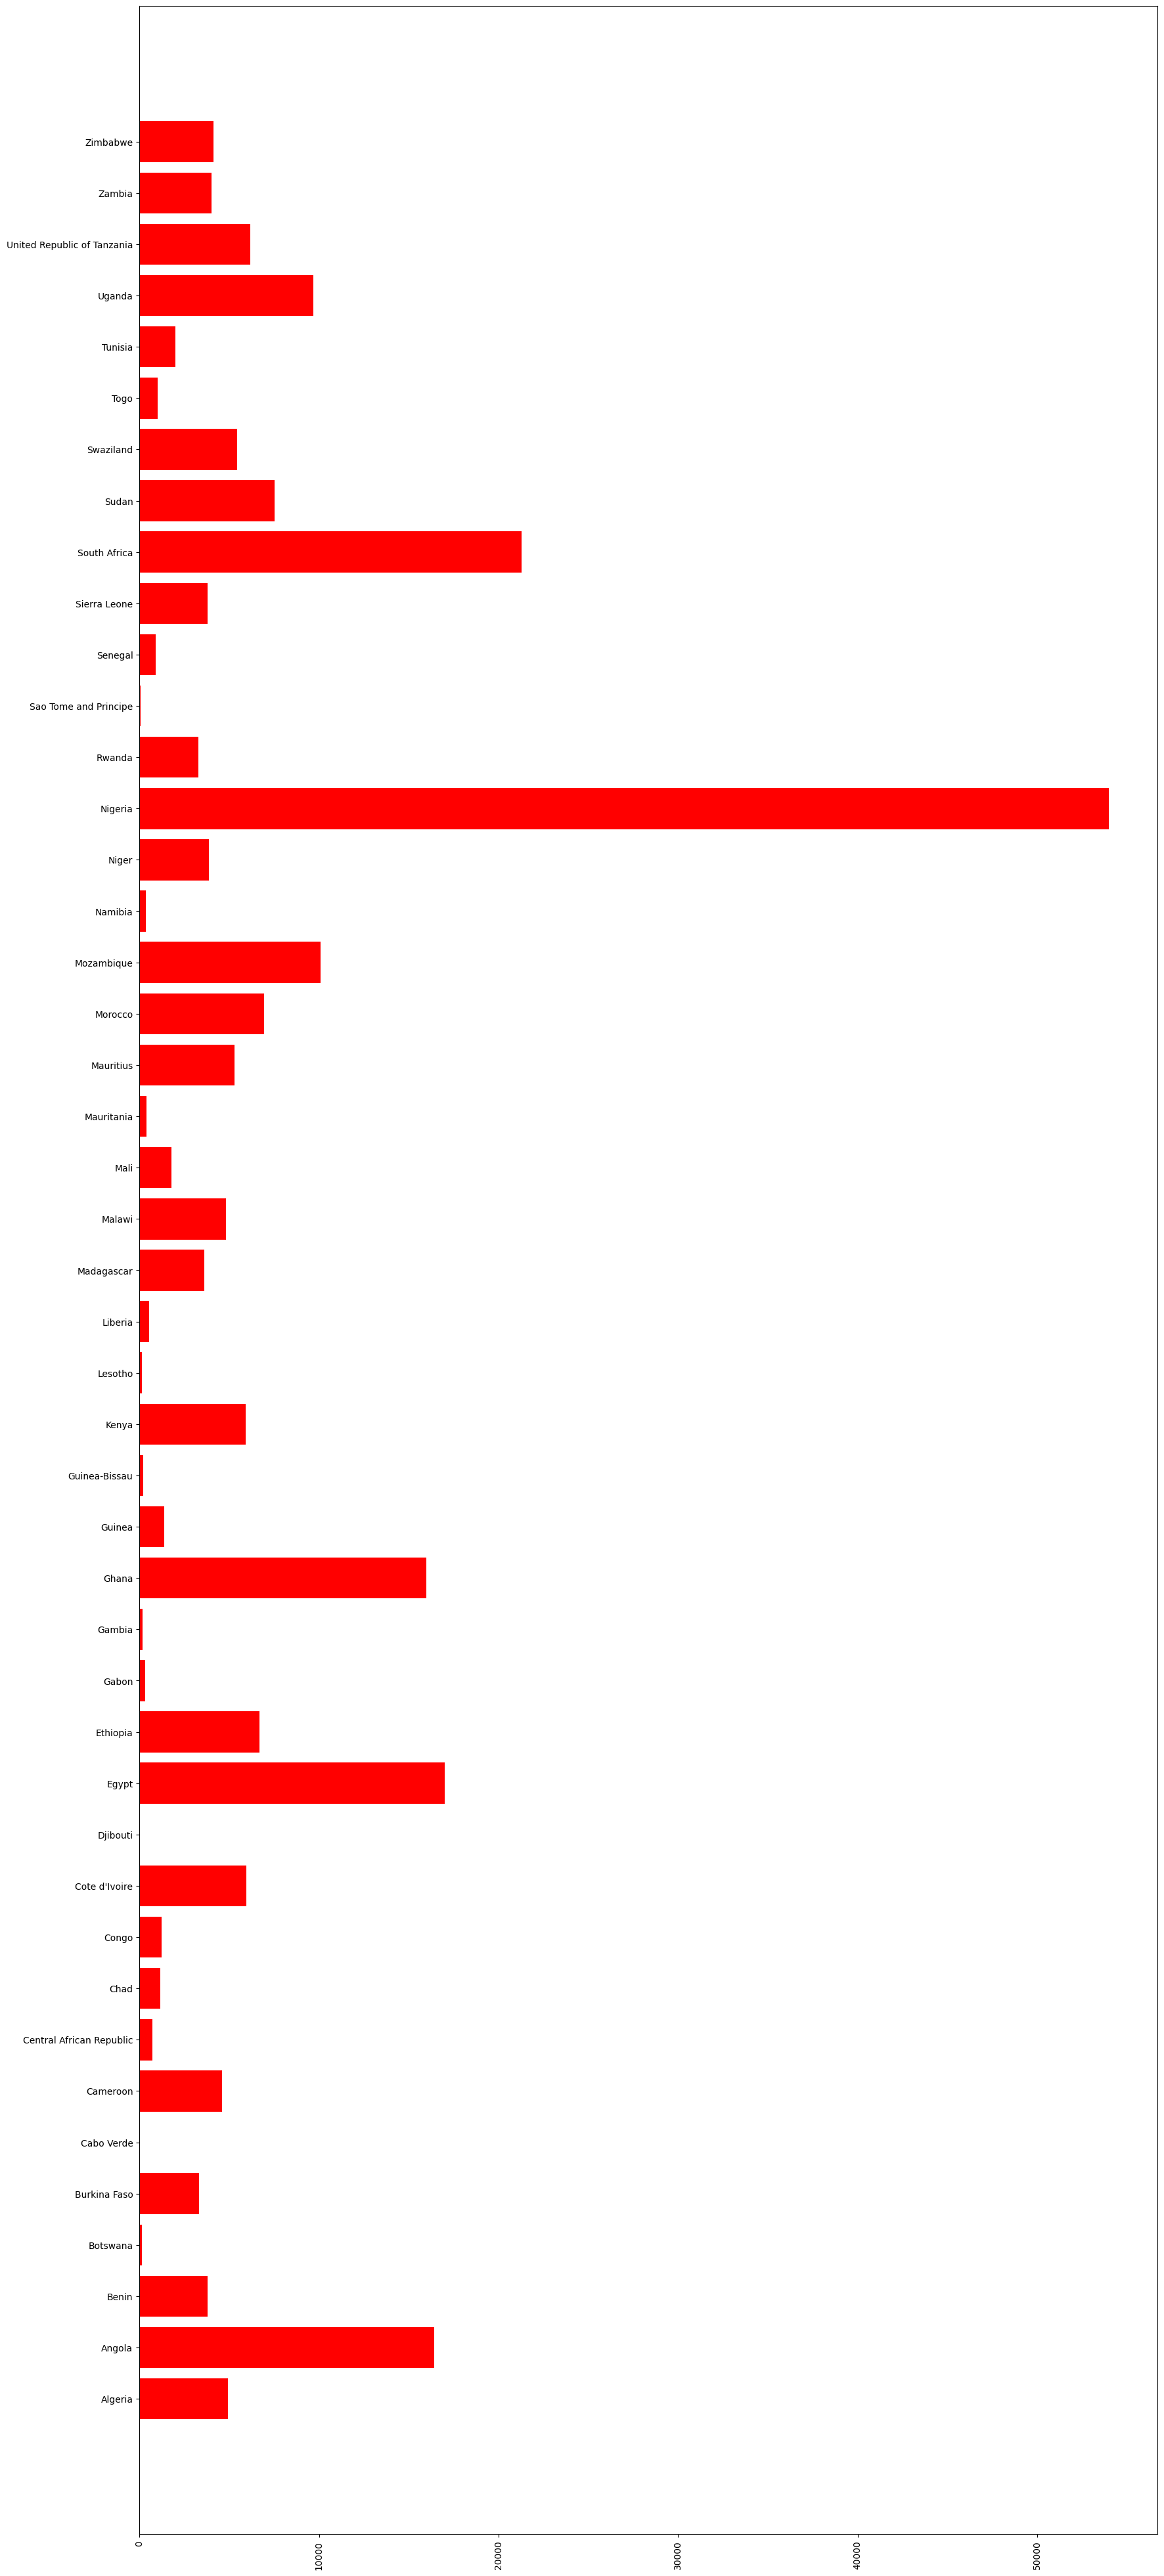

In [ ]:
fig = plt.figure(figsize=(20,50))
plt.barh(df['Country'],df['Value'], color='red')
plt.xticks(rotation=90)

**[Highest and least food producing Countries:](https:// [link text](https:// [link text](https:// [link text](https://))))**

Nigeria, Egypt and South Africa are the highest food producing countries while
Cabo Verde, Djibouti and Sao Tome and Principe are the least producing food countries.





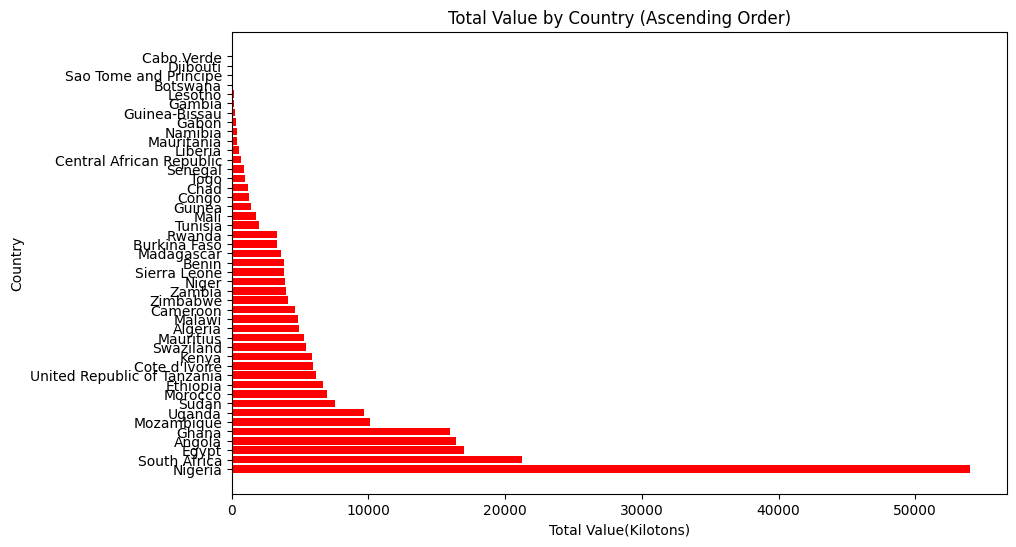

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(grouped_df_sort['Country'], grouped_df_sort['Value'], color='red')
plt.xlabel('Total Value(Kilotons)')
plt.ylabel('Country')
plt.title('Total Value by Country (Ascending Order)')
plt.show()

**The foods produced food in Nigeria**

In [ ]:
Nigeria = df[df.Country == 'Nigeria']
Nigeria

Country                Item  Year  Value
15380  Nigeria  Wheat and products  2004     62
15381  Nigeria  Wheat and products  2005     66
15382  Nigeria  Wheat and products  2006     71
15383  Nigeria  Wheat and products  2007     44
15384  Nigeria  Wheat and products  2008     53
...        ...                 ...   ...    ...
15985  Nigeria     Molluscs, Other  2009      3
15986  Nigeria     Molluscs, Other  2010      3
15987  Nigeria     Molluscs, Other  2011      4
15988  Nigeria     Molluscs, Other  2012      4
15989  Nigeria     Molluscs, Other  2013      4

[610 rows x 4 columns]

**The most produced food in Nigeria**

Cassava and products

**The least produced food in Nigeria**

Cephalopods

In [ ]:
Nigeria_sort = Nigeria.sort_values(by='Value', ascending=False)
Nigeria_sort

Country                  Item  Year  Value
15448  Nigeria  Cassava and products  2012  54000
15449  Nigeria  Cassava and products  2013  53000
15447  Nigeria  Cassava and products  2011  52403
15442  Nigeria  Cassava and products  2006  45721
15444  Nigeria  Cassava and products  2008  44582
...        ...                   ...   ...    ...
15973  Nigeria           Cephalopods  2007      0
15972  Nigeria           Cephalopods  2006      0
15971  Nigeria           Cephalopods  2005      0
15970  Nigeria           Cephalopods  2004      0
15977  Nigeria           Cephalopods  2011      0

[610 rows x 4 columns]

**BarChart showing food produced in Nigeria from the highest to the lowest**

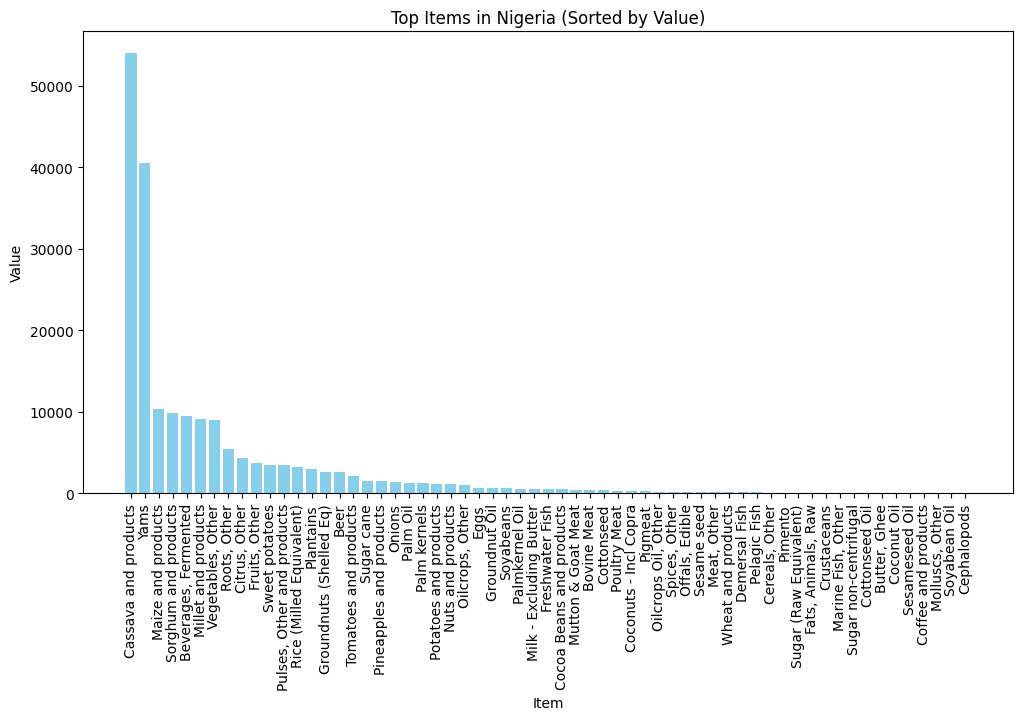

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(Nigeria_sort['Item'], Nigeria_sort['Value'], color='skyblue')
plt.xlabel('Item')
plt.ylabel('Value')
plt.title('Top Items in Nigeria (Sorted by Value)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
South_Africa= df[df.Country == 'South Africa']
South_Africa

Country                Item  Year  Value
17760  South Africa  Wheat and products  2004   1687
17761  South Africa  Wheat and products  2005   1905
17762  South Africa  Wheat and products  2006   2105
17763  South Africa  Wheat and products  2007   1905
17764  South Africa  Wheat and products  2008   2130
...             ...                 ...   ...    ...
18505  South Africa      Aquatic Plants  2009     13
18506  South Africa      Aquatic Plants  2010     14
18507  South Africa      Aquatic Plants  2011     14
18508  South Africa      Aquatic Plants  2012     18
18509  South Africa      Aquatic Plants  2013     15

[750 rows x 4 columns]

In [ ]:
South_Africa_sort = South_Africa.sort_values(by='Value', ascending=False)
South_Africa_sort

Country             Item  Year  Value
17871  South Africa       Sugar cane  2005  21265
17872  South Africa       Sugar cane  2006  20275
17879  South Africa       Sugar cane  2013  20033
17873  South Africa       Sugar cane  2007  19724
17874  South Africa       Sugar cane  2008  19255
...             ...              ...   ...    ...
18069  South Africa      Coconut Oil  2013      0
18068  South Africa      Coconut Oil  2012      0
18067  South Africa      Coconut Oil  2011      0
18064  South Africa      Coconut Oil  2008      0
18396  South Africa  Fish, Liver Oil  2010      0

[750 rows x 4 columns]

**BarChart showing food produced in South Africa from the highest to the lowest**



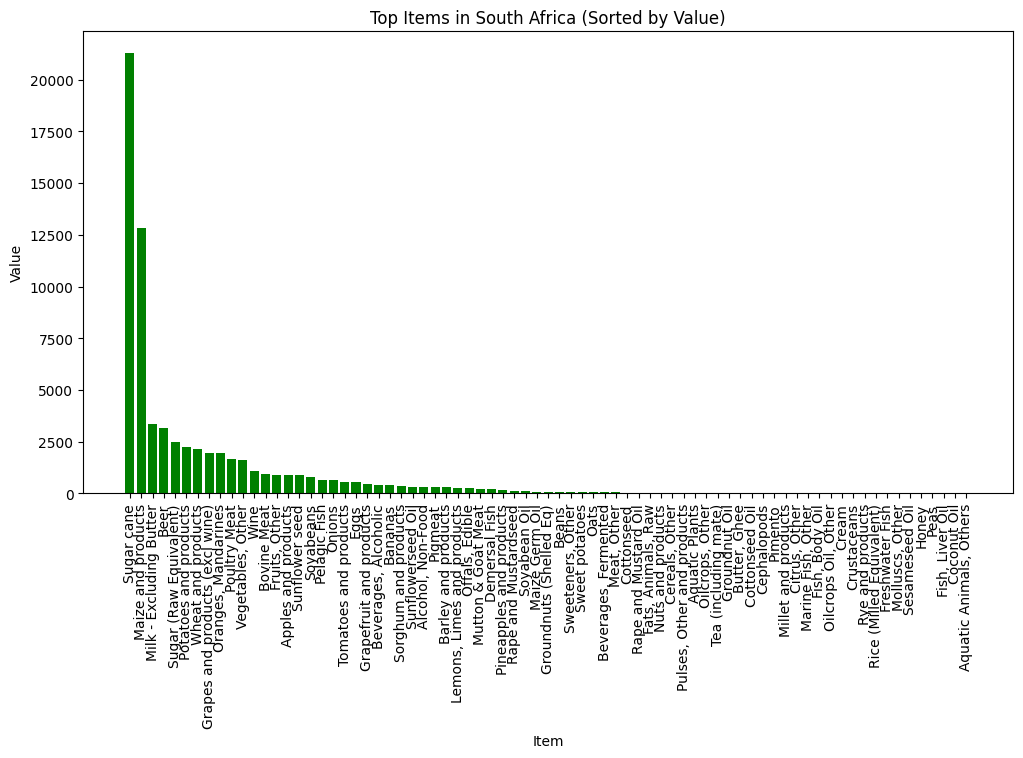

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(South_Africa_sort['Item'], South_Africa_sort['Value'], color='green')
plt.xlabel('Item')
plt.ylabel('Value')
plt.title('Top Items in South Africa (Sorted by Value)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Egypt = df[df.Country == 'Egypt']
Egypt

Country                Item  Year  Value
5660   Egypt  Wheat and products  2004   7178
5661   Egypt  Wheat and products  2005   8141
5662   Egypt  Wheat and products  2006   8274
5663   Egypt  Wheat and products  2007   7379
5664   Egypt  Wheat and products  2008   7977
...      ...                 ...   ...    ...
6355   Egypt      Aquatic Plants  2009      0
6356   Egypt      Aquatic Plants  2010      0
6357   Egypt      Aquatic Plants  2011      0
6358   Egypt      Aquatic Plants  2012      0
6359   Egypt      Aquatic Plants  2013      0

[700 rows x 4 columns]

In [ ]:
Egypt_sort = Egypt.sort_values(by='Value', ascending=False)
Egypt_sort

Country            Item  Year  Value
5753   Egypt      Sugar cane  2007  17014
5752   Egypt      Sugar cane  2006  16656
5754   Egypt      Sugar cane  2008  16470
5751   Egypt      Sugar cane  2005  16317
5750   Egypt      Sugar cane  2004  16230
...      ...             ...   ...    ...
5816   Egypt            Peas  2010      0
5815   Egypt            Peas  2009      0
5814   Egypt            Peas  2008      0
5813   Egypt            Peas  2007      0
6359   Egypt  Aquatic Plants  2013      0

[700 rows x 4 columns]

**BarChart showing food produced in South Africa from the highest to the lowest**

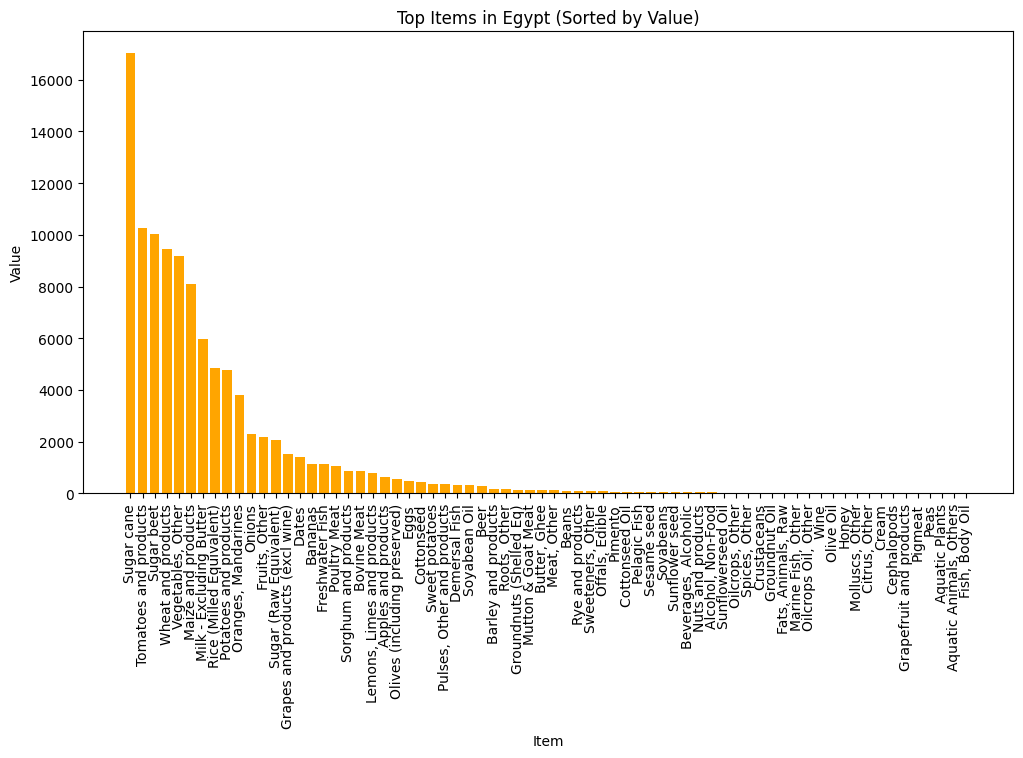

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(Egypt_sort['Item'], Egypt_sort['Value'], color='orange')
plt.xlabel('Item')
plt.ylabel('Value')
plt.title('Top Items in Egypt (Sorted by Value)')
plt.xticks(rotation=90)
plt.show()

**The Country that produces the most varieties of Items**

United Republic of Tanzania produced a total of 79 Items
Morocco produced a total of 77 items
Kenya and South Africa produced a total of 75 items

In [ ]:
total_food_items_by_country = df.groupby("Country")["Item"].nunique().reset_index()

# Display the total number of food items by country
print(total_food_items_by_country)

                        Country  Item
0                       Algeria    58
1                        Angola    54
2                         Benin    59
3                      Botswana    34
4                  Burkina Faso    43
5                    Cabo Verde    33
6                      Cameroon    65
7      Central African Republic    45
8                          Chad    39
9                         Congo    50
10                Cote d'Ivoire    64
11                     Djibouti    22
12                        Egypt    70
13                     Ethiopia    60
14                        Gabon    40
15                       Gambia    36
16                        Ghana    58
17                       Guinea    50
18                Guinea-Bissau    44
19                        Kenya    75
20                      Lesotho    23
21                      Liberia    42
22                   Madagascar    69
23                       Malawi    48
24                         Mali    48
25          

**United Republic of Tanzania, Morrocco, Kenya and South Africa has more products than other countries**

while

**Djibouti, Lesotho and Sao Tome and Principle has the least products compared to other countries**

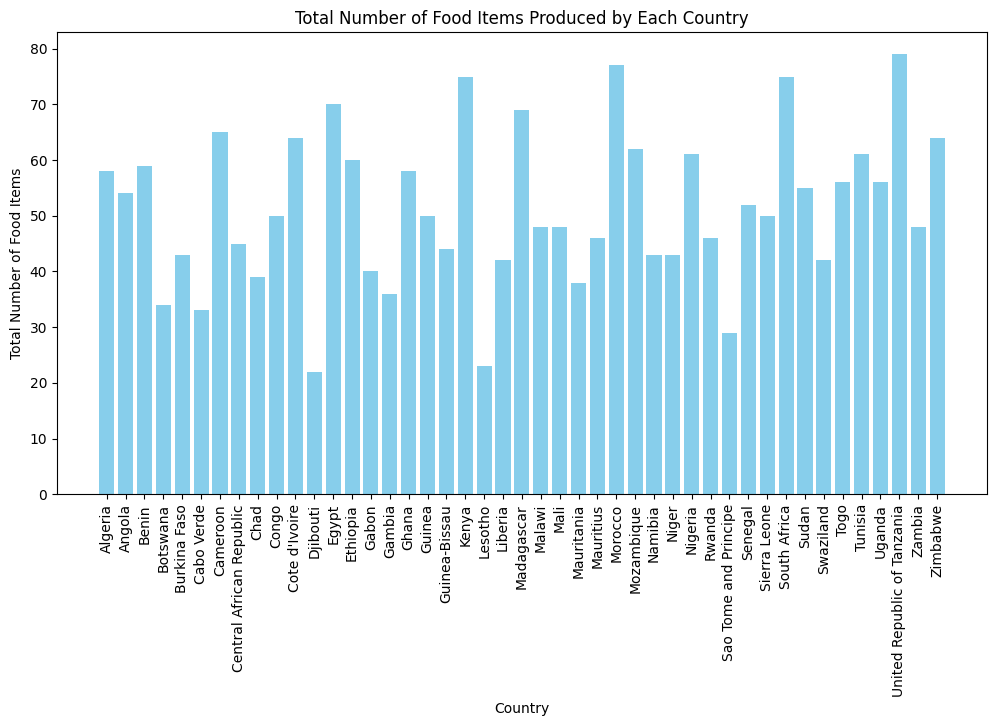

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(total_food_items_by_country['Country'], total_food_items_by_country['Item'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Number of Food Items')
plt.title('Total Number of Food Items Produced by Each Country')
plt.xticks(rotation=90)
plt.show()

**Sugarcane is the most produced food in South Africa and Egypt, I would want to visualize other countries that produced sugarcane the most**

In [ ]:
sugarcane = df[df.Item == 'Sugar cane']
sugarcane

Country        Item  Year  Value
660      Angola  Sugar cane  2004    345
661      Angola  Sugar cane  2005    345
662      Angola  Sugar cane  2006    450
663      Angola  Sugar cane  2007    500
664      Angola  Sugar cane  2008    520
...         ...         ...   ...    ...
22595  Zimbabwe  Sugar cane  2009   2338
22596  Zimbabwe  Sugar cane  2010   2692
22597  Zimbabwe  Sugar cane  2011   3058
22598  Zimbabwe  Sugar cane  2012   3929
22599  Zimbabwe  Sugar cane  2013   3880

[360 rows x 4 columns]

In [ ]:
total_sugarcane_by_country = sugarcane.groupby('Country')['Value'].sum().reset_index()

# Sort in descending order to find the top sugarcane producing countries
top_sugarcane_countries = total_sugarcane_by_country.sort_values(by='Value', ascending=False)

# Display the top sugarcane producing countries
print(top_sugarcane_countries)


                        Country   Value
29                 South Africa  188396
10                        Egypt  160973
30                        Sudan   69371
16                        Kenya   53094
31                    Swaziland   50850
21                    Mauritius   44808
35                     Zimbabwe   32709
34                       Zambia   29680
32                       Uganda   29600
18                   Madagascar   28031
23                   Mozambique   26209
33  United Republic of Tanzania   26150
19                       Malawi   25500
11                     Ethiopia   25304
8                 Cote d'Ivoire   16811
25                      Nigeria   12840
4                      Cameroon   12677
27                      Senegal    8516
22                      Morocco    7868
7                         Congo    6089
0                        Angola    4700
2                  Burkina Faso    4595
6                          Chad    3892
20                         Mali    3557


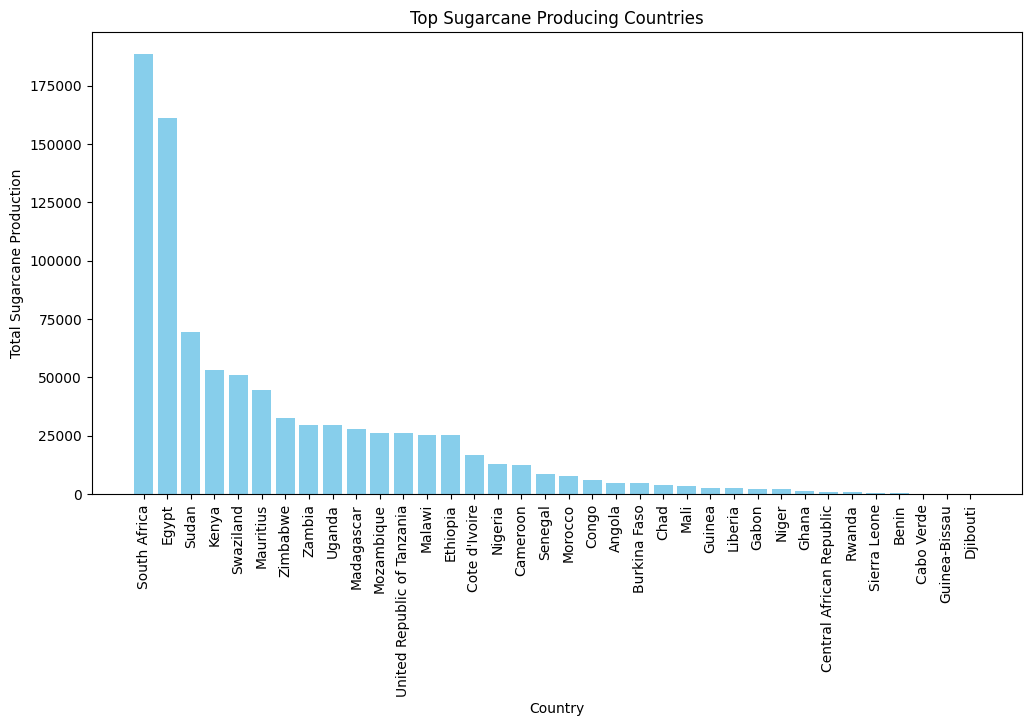

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_sugarcane_countries['Country'], top_sugarcane_countries['Value'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sugarcane Production')
plt.title('Top Sugarcane Producing Countries')
plt.xticks(rotation=90)
plt.show()

**South Africa, Egypt and Sudan are the top Sugarcane producing countries**

The sum of items produced every year

In [ ]:
# Group by Country, Year and Value to see the sum of items produced each year in each country
total_by_country_year = grouped_df.groupby(["Country", "Year"]).sum().reset_index()
total_by_country_year

<ipython-input-78-fb7af7a31ff5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_by_country_year = grouped_df.groupby(["Country", "Year"]).sum().reset_index()


Country  Year  Value
0     Algeria  2004  15536
1     Algeria  2005  15667
2     Algeria  2006  16417
3     Algeria  2007  14763
4     Algeria  2008  13841
..        ...   ...    ...
445  Zimbabwe  2009   5754
446  Zimbabwe  2010   6777
447  Zimbabwe  2011   7551
448  Zimbabwe  2012   8173
449  Zimbabwe  2013   7914

[450 rows x 3 columns]

Total Value produced by each country from the higest to the lowest

In [ ]:
pd.DataFrame(df.groupby(['Country'])['Value'].sum().sort_values(ascending=False))

Value
Country                             
Nigeria                      1628030
Egypt                         877498
South Africa                  579592
Ethiopia                      350693
United Republic of Tanzania   332802
Sudan                         301584
Ghana                         295004
Uganda                        278421
Morocco                       271821
Kenya                         256872
Cameroon                      197670
Angola                        195499
Algeria                       188650
Cote d'Ivoire                 182486
Mozambique                    157584
Malawi                        153717
Madagascar                    133071
Burkina Faso                  100129
Rwanda                         95174
Tunisia                        92713
Mali                           92292
Benin                          88072
Niger                          86808
Zambia                         82701
Zimbabwe                       73316
Guinea                         66848
Swaziland                      62665
Mauritius                      51785
Senegal                        49414
Sierra Leone                   47737
Chad                           45078
Togo                           32155
Congo                          25791
Central African Republic       24921
Liberia                        14657
Namibia                        14197
Gabon                          13566
Mauritania                     10039
Guinea-Bissau                   7296
Botswana                        4808
Gambia                          4699
Lesotho                         3785
Cabo Verde                      1658
Sao Tome and Principe           1152
Djibouti                         666

Percent Distribution of the total values for each Countries

<Figure size 1500x800 with 0 Axes>

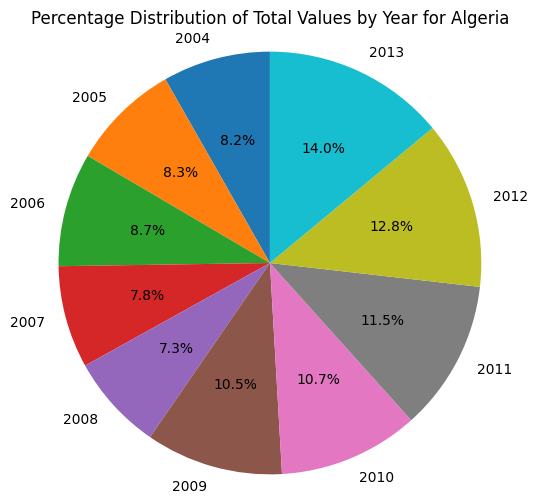

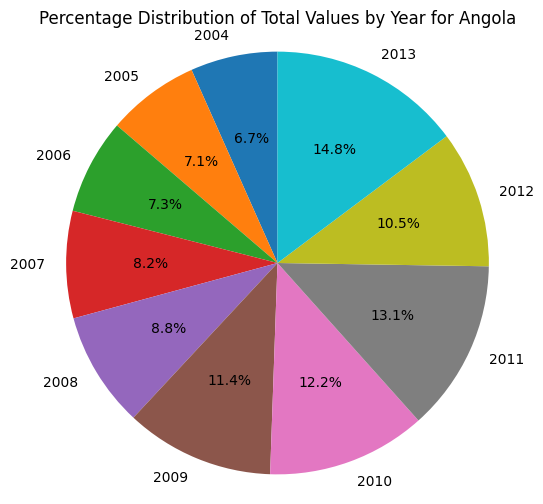

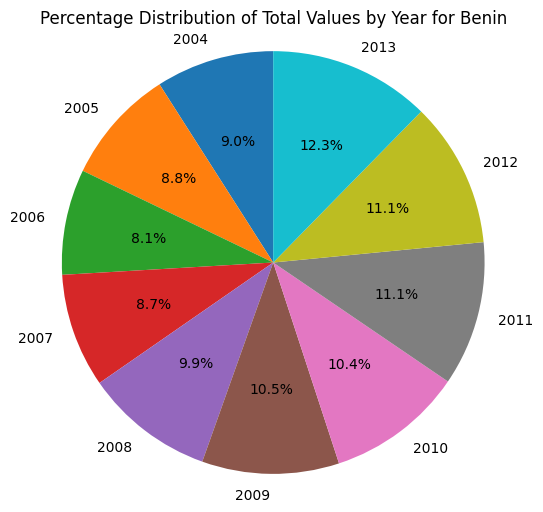

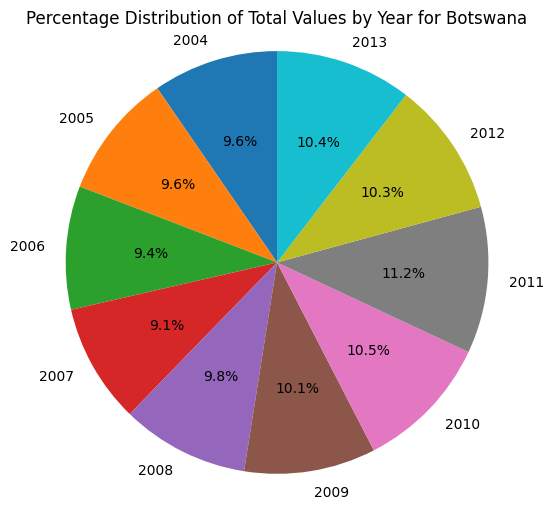

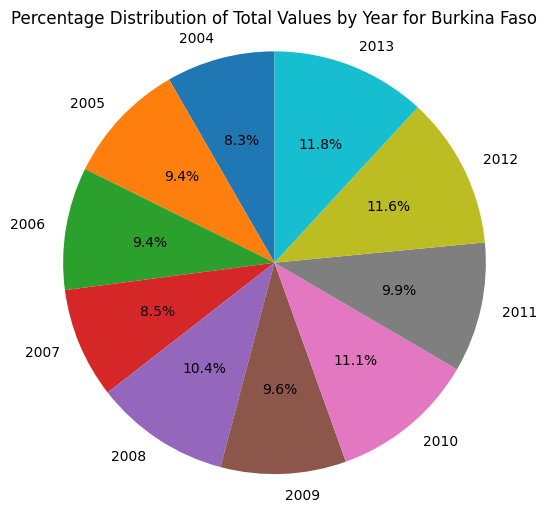

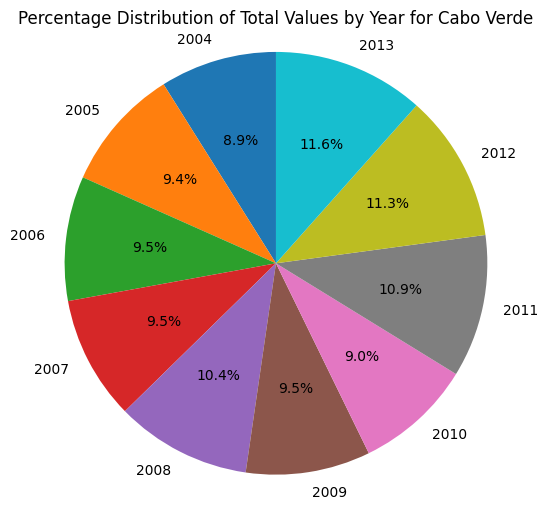

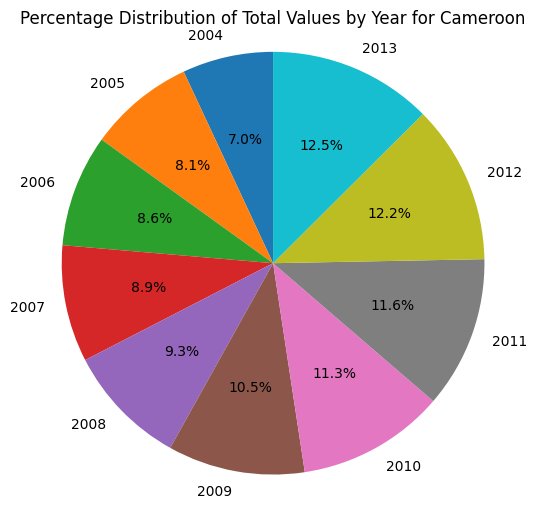

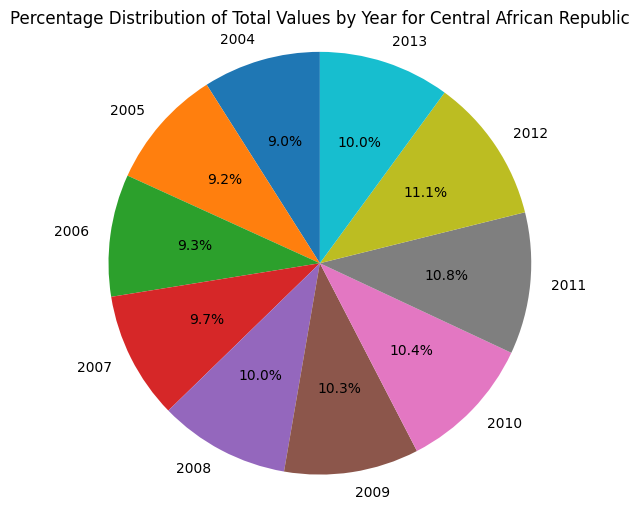

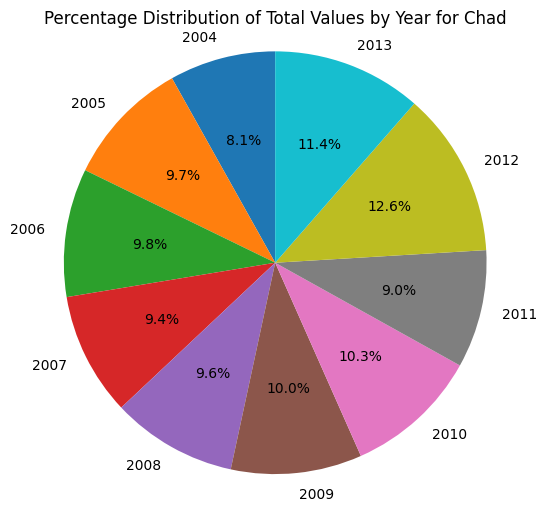

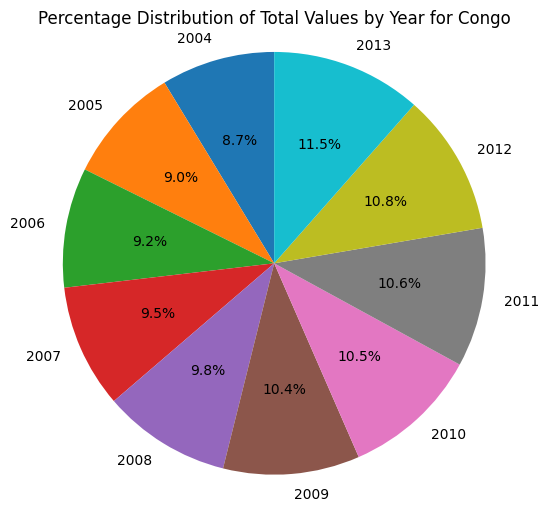

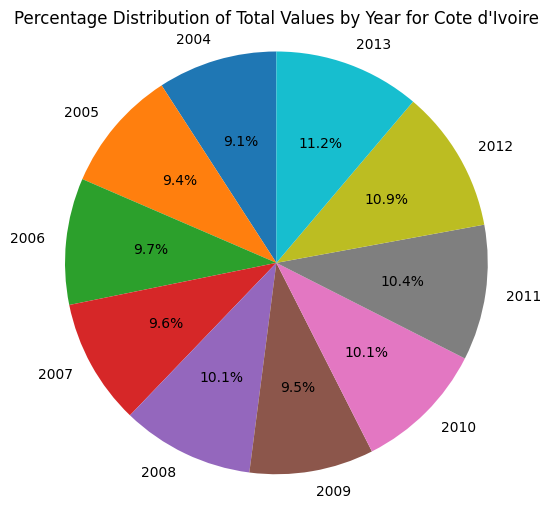

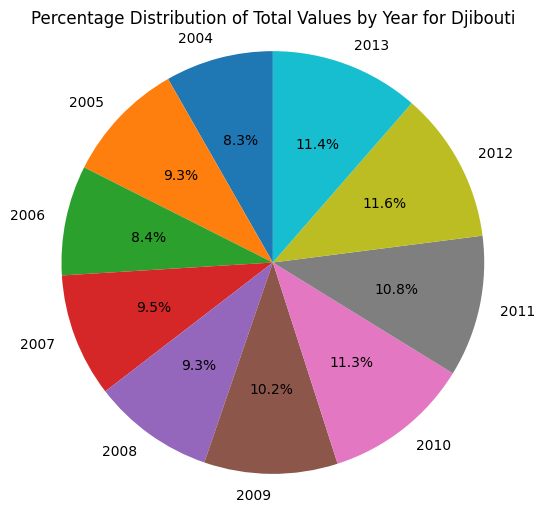

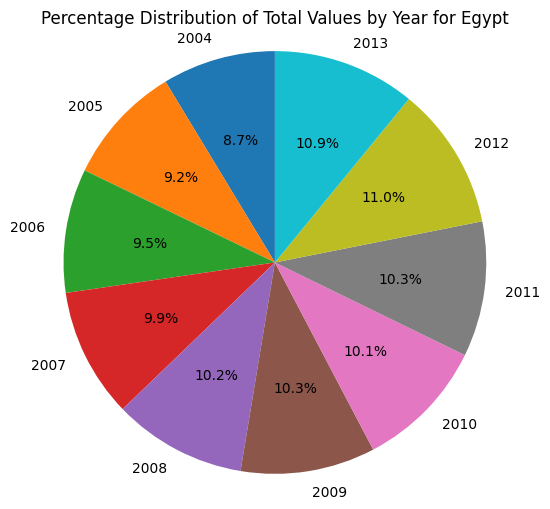

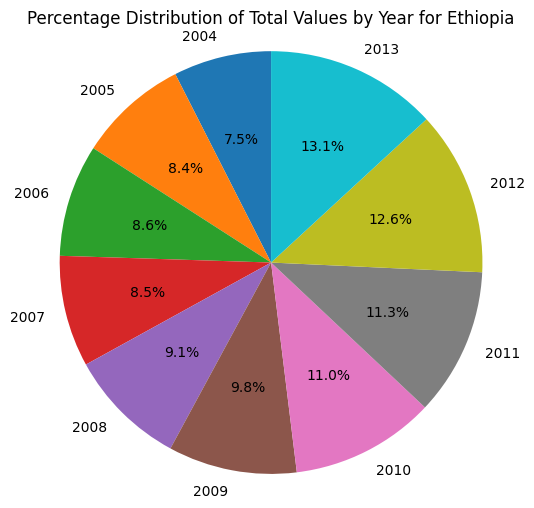

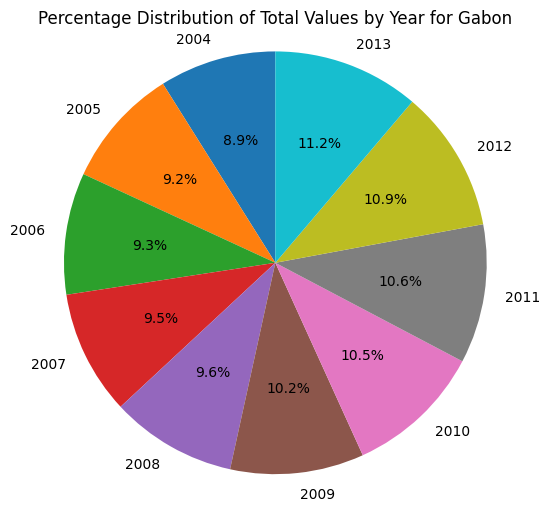

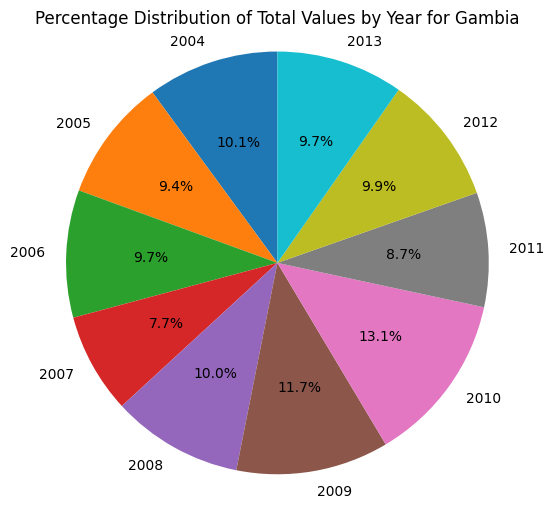

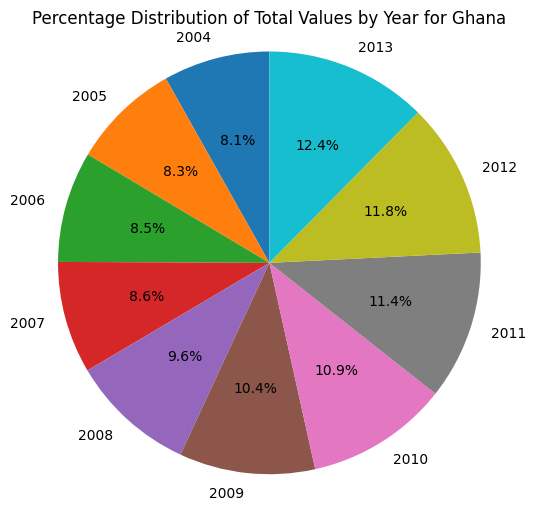

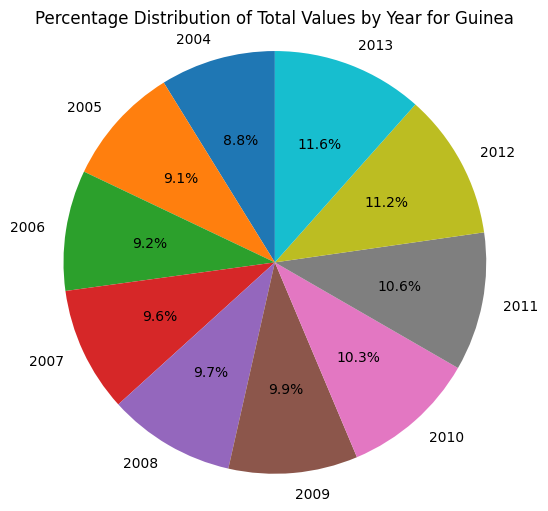

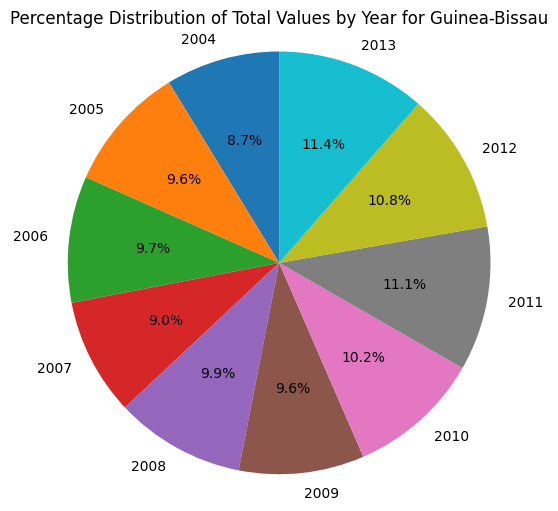

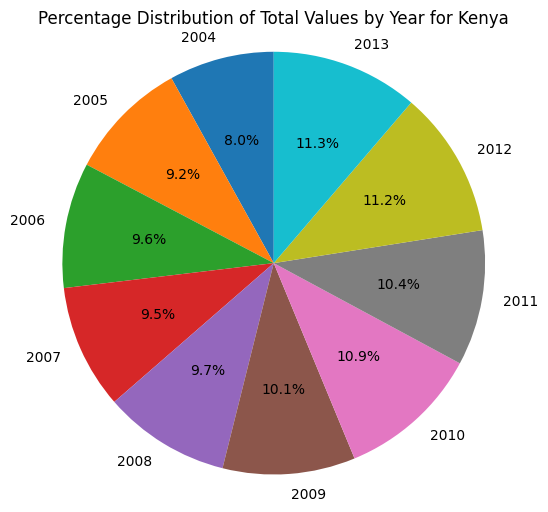

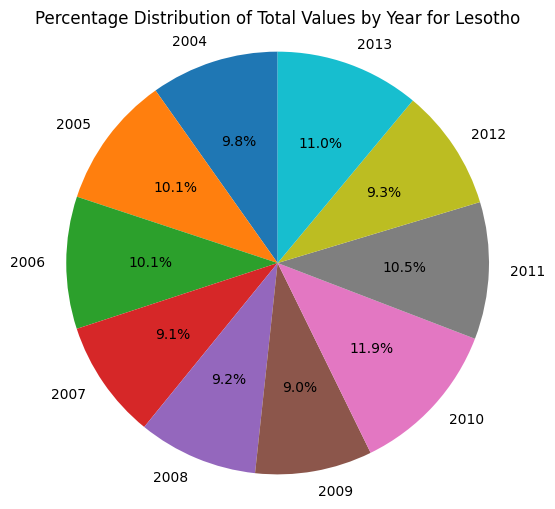

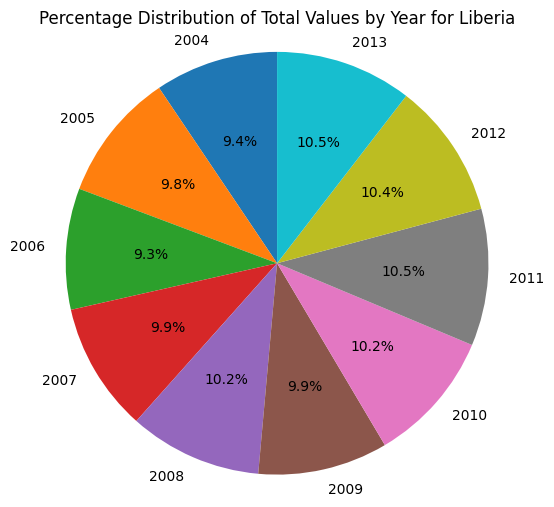

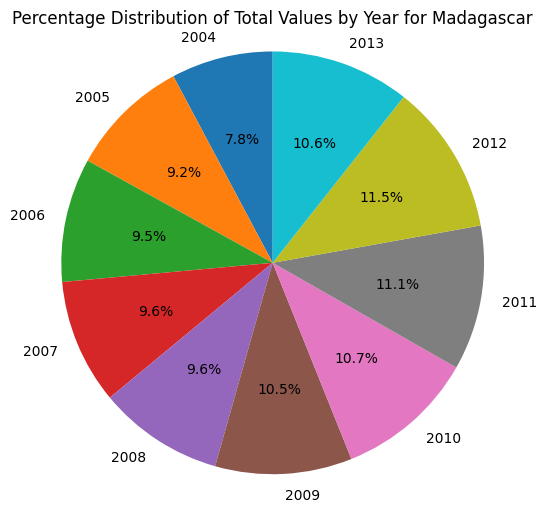

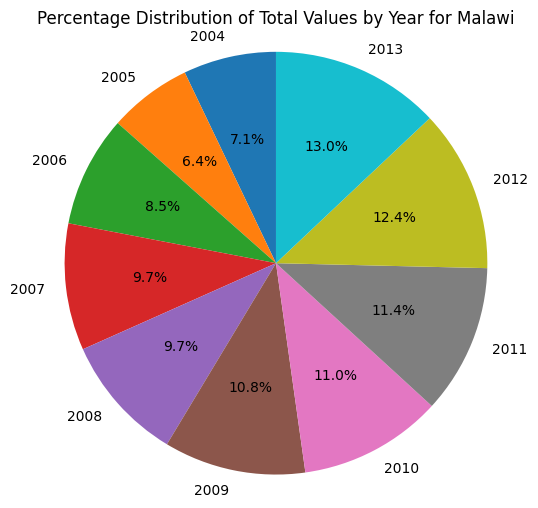

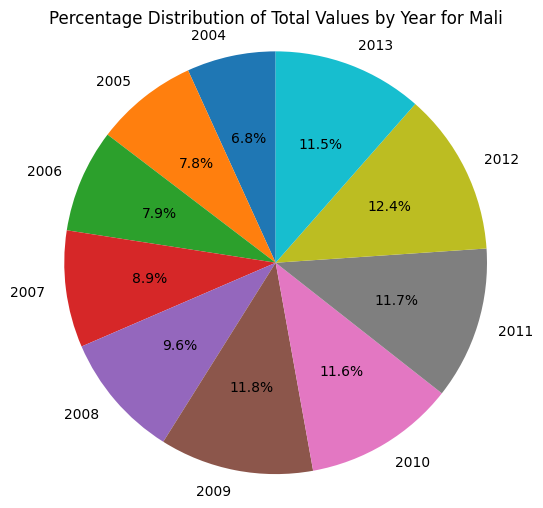

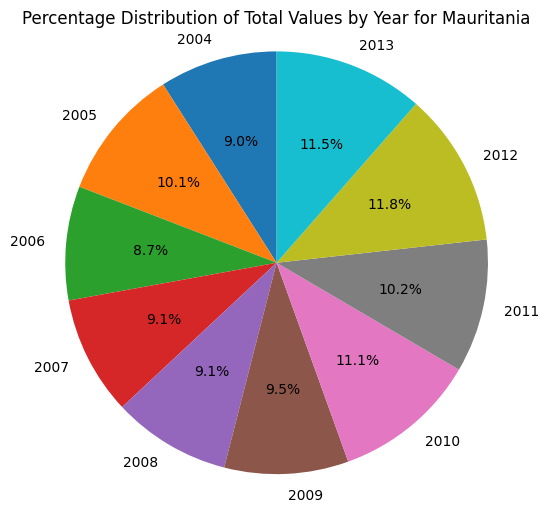

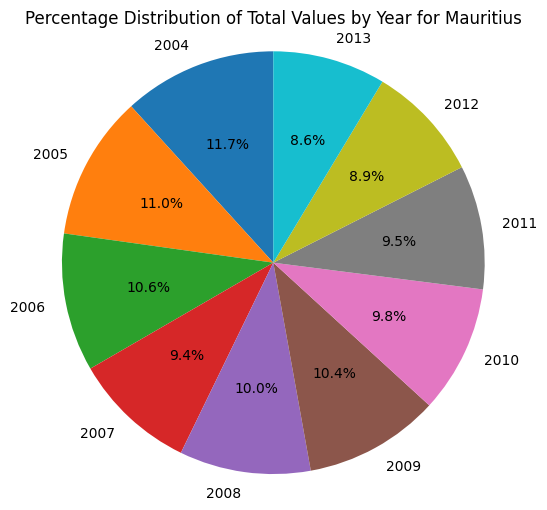

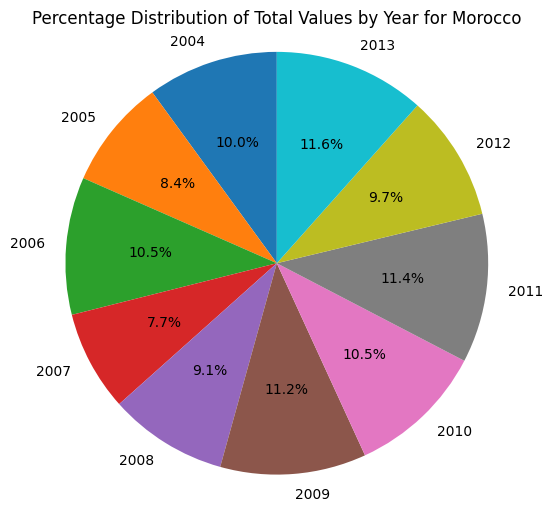

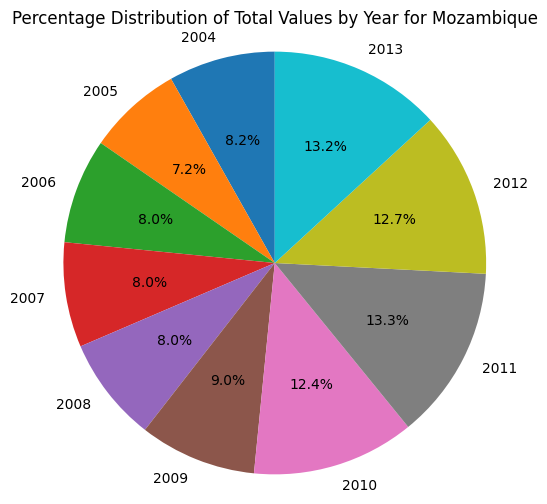

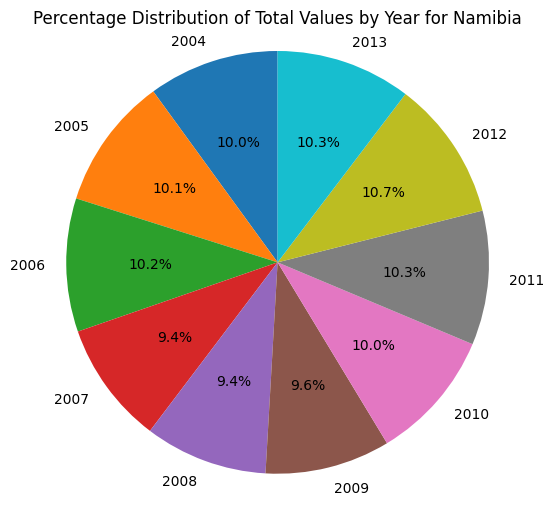

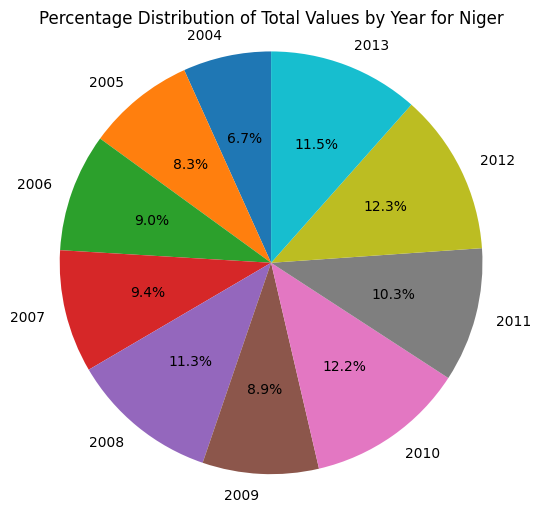

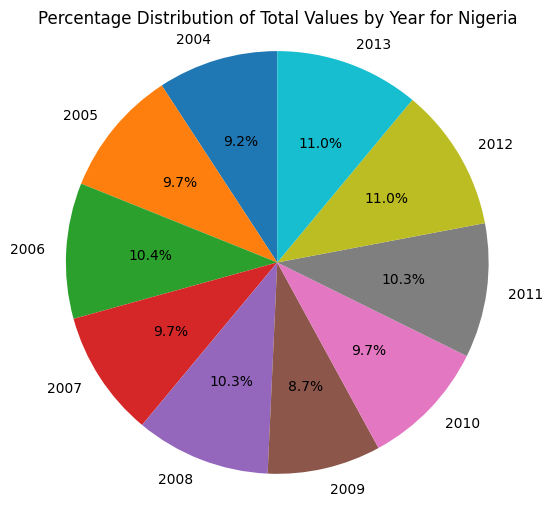

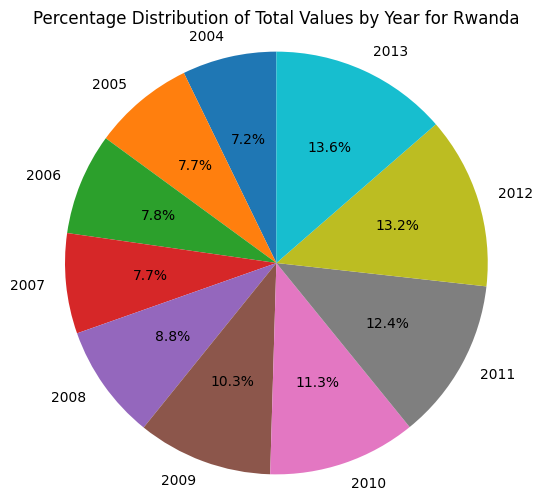

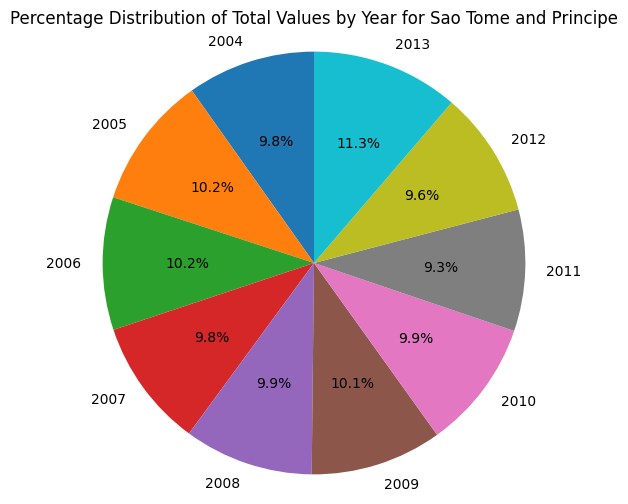

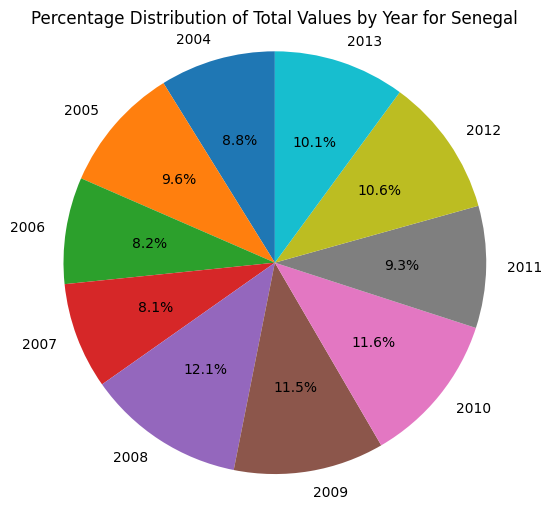

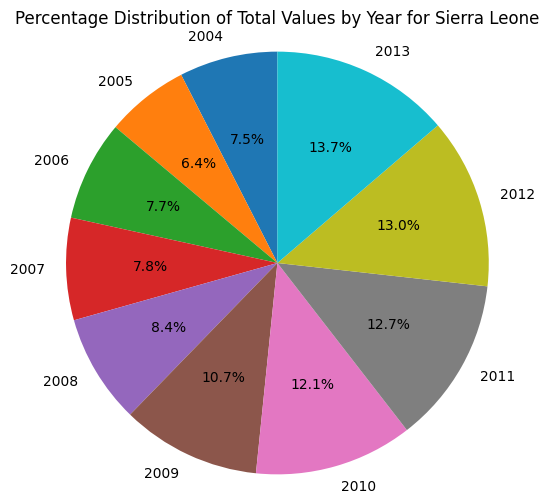

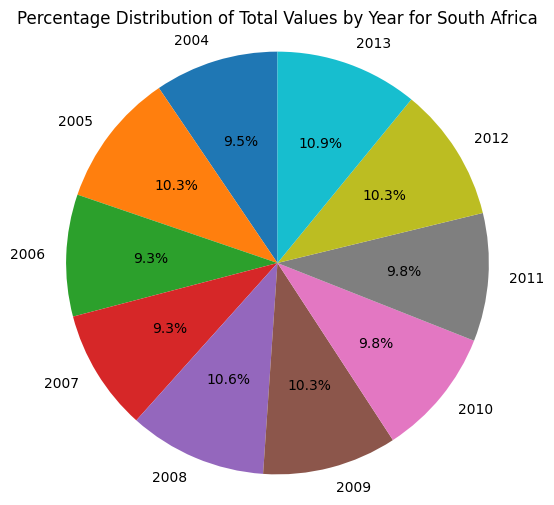

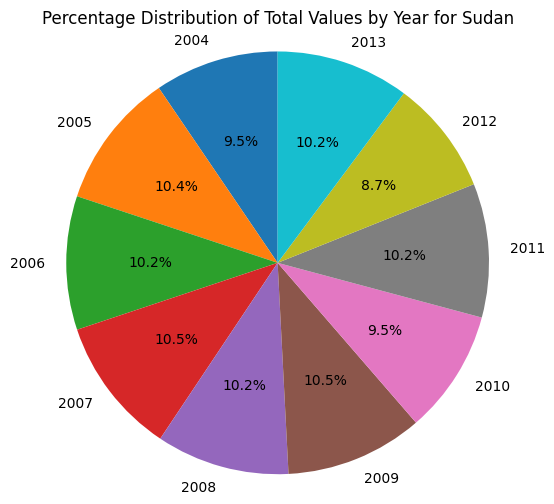

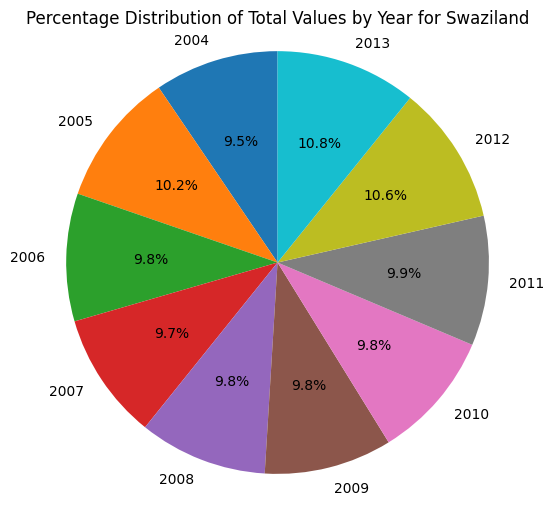

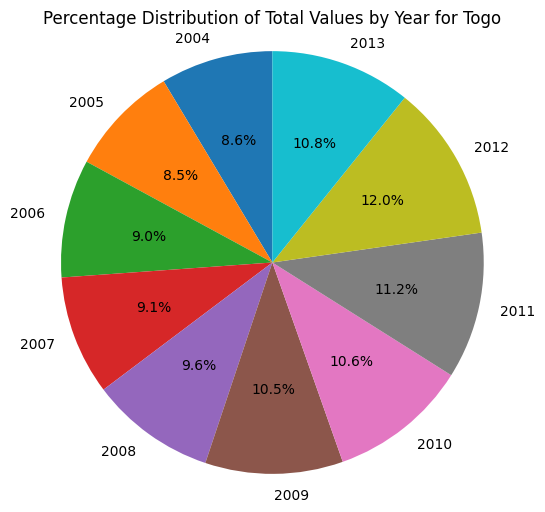

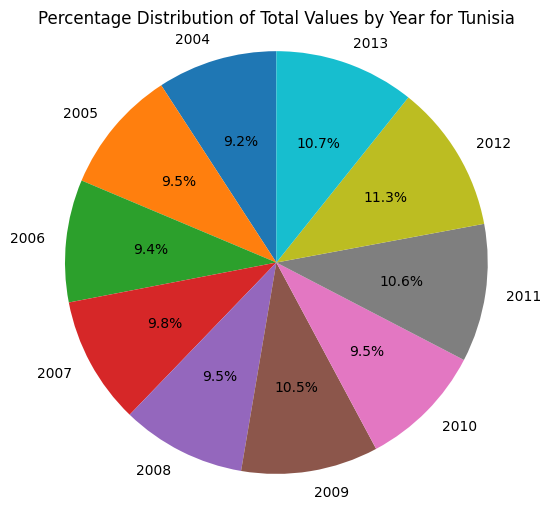

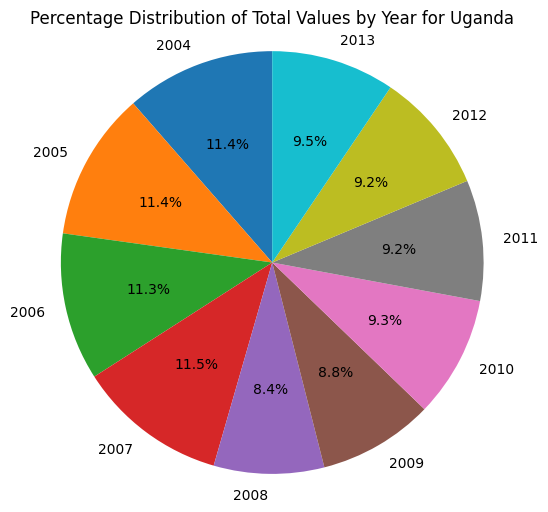

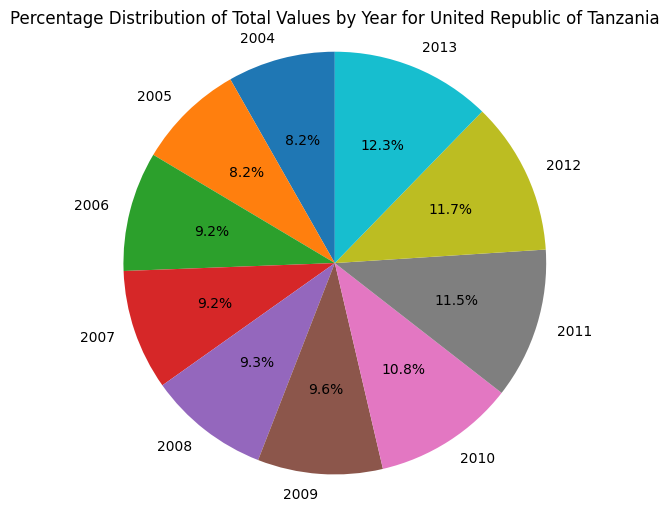

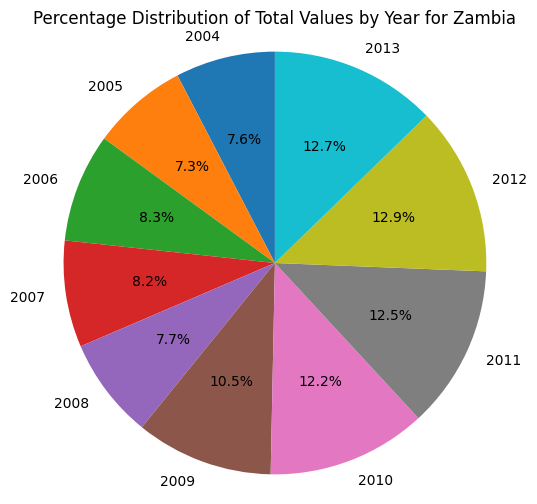

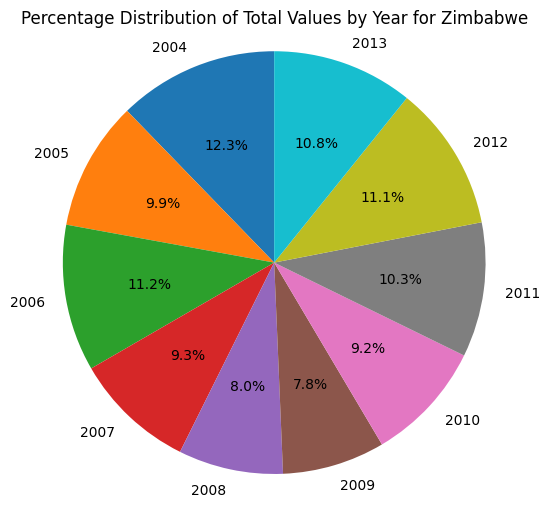

In [ ]:
countries = total_by_country_year['Country'].unique()

plt.figure(figsize=(15, 8))

for country in countries:
    data_country = total_by_country_year[total_by_country_year['Country'] == country]
    plt.figure(figsize=(6, 6))
    plt.pie(data_country['Value'], labels=data_country['Year'].astype(str), autopct='%1.1f%%', startangle=90, labeldistance=1.1)
    plt.title(f'Percentage Distribution of Total Values by Year for {country}')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
    plt.show()

Percent Distribution of the total values for all the Countries

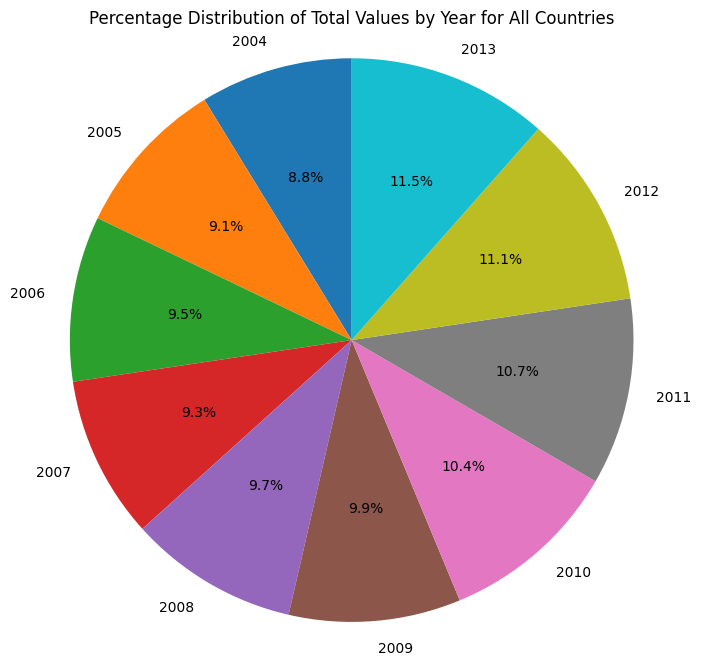

In [ ]:
total_values_by_year = total_by_country_year.groupby('Year')['Value'].sum().reset_index()

plt.figure(figsize=(8, 8))

plt.pie(total_values_by_year['Value'], labels=total_values_by_year['Year'].astype(str), autopct='%1.1f%%', startangle=90, labeldistance=1.1)
plt.title('Percentage Distribution of Total Values by Year for All Countries')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [ ]:
np.unique(grouped_df["Item"])

array(['Alcohol, Non-Food', 'Apples and products',
       'Aquatic Animals, Others', 'Aquatic Plants', 'Bananas',
       'Barley and products', 'Beans', 'Beer', 'Beverages, Alcoholic',
       'Beverages, Fermented', 'Bovine Meat', 'Butter, Ghee',
       'Cassava and products', 'Cephalopods', 'Cereals, Other',
       'Citrus, Other', 'Cloves', 'Cocoa Beans and products',
       'Coconut Oil', 'Coconuts - Incl Copra', 'Coffee and products',
       'Cottonseed', 'Cottonseed Oil', 'Cream', 'Crustaceans', 'Dates',
       'Demersal Fish', 'Eggs', 'Fats, Animals, Raw', 'Fish, Body Oil',
       'Fish, Liver Oil', 'Freshwater Fish', 'Fruits, Other',
       'Grapefruit and products', 'Grapes and products (excl wine)',
       'Groundnut Oil', 'Groundnuts (Shelled Eq)', 'Honey',
       'Lemons, Limes and products', 'Maize Germ Oil',
       'Maize and products', 'Marine Fish, Other', 'Meat, Other',
       'Milk - Excluding Butter', 'Millet and products',
       'Molluscs, Other', 'Mutton & Goat Mea

**The piechart below shows that cassava and sugarcane are the most produced foods with 14.8% and 11.7% respectively**

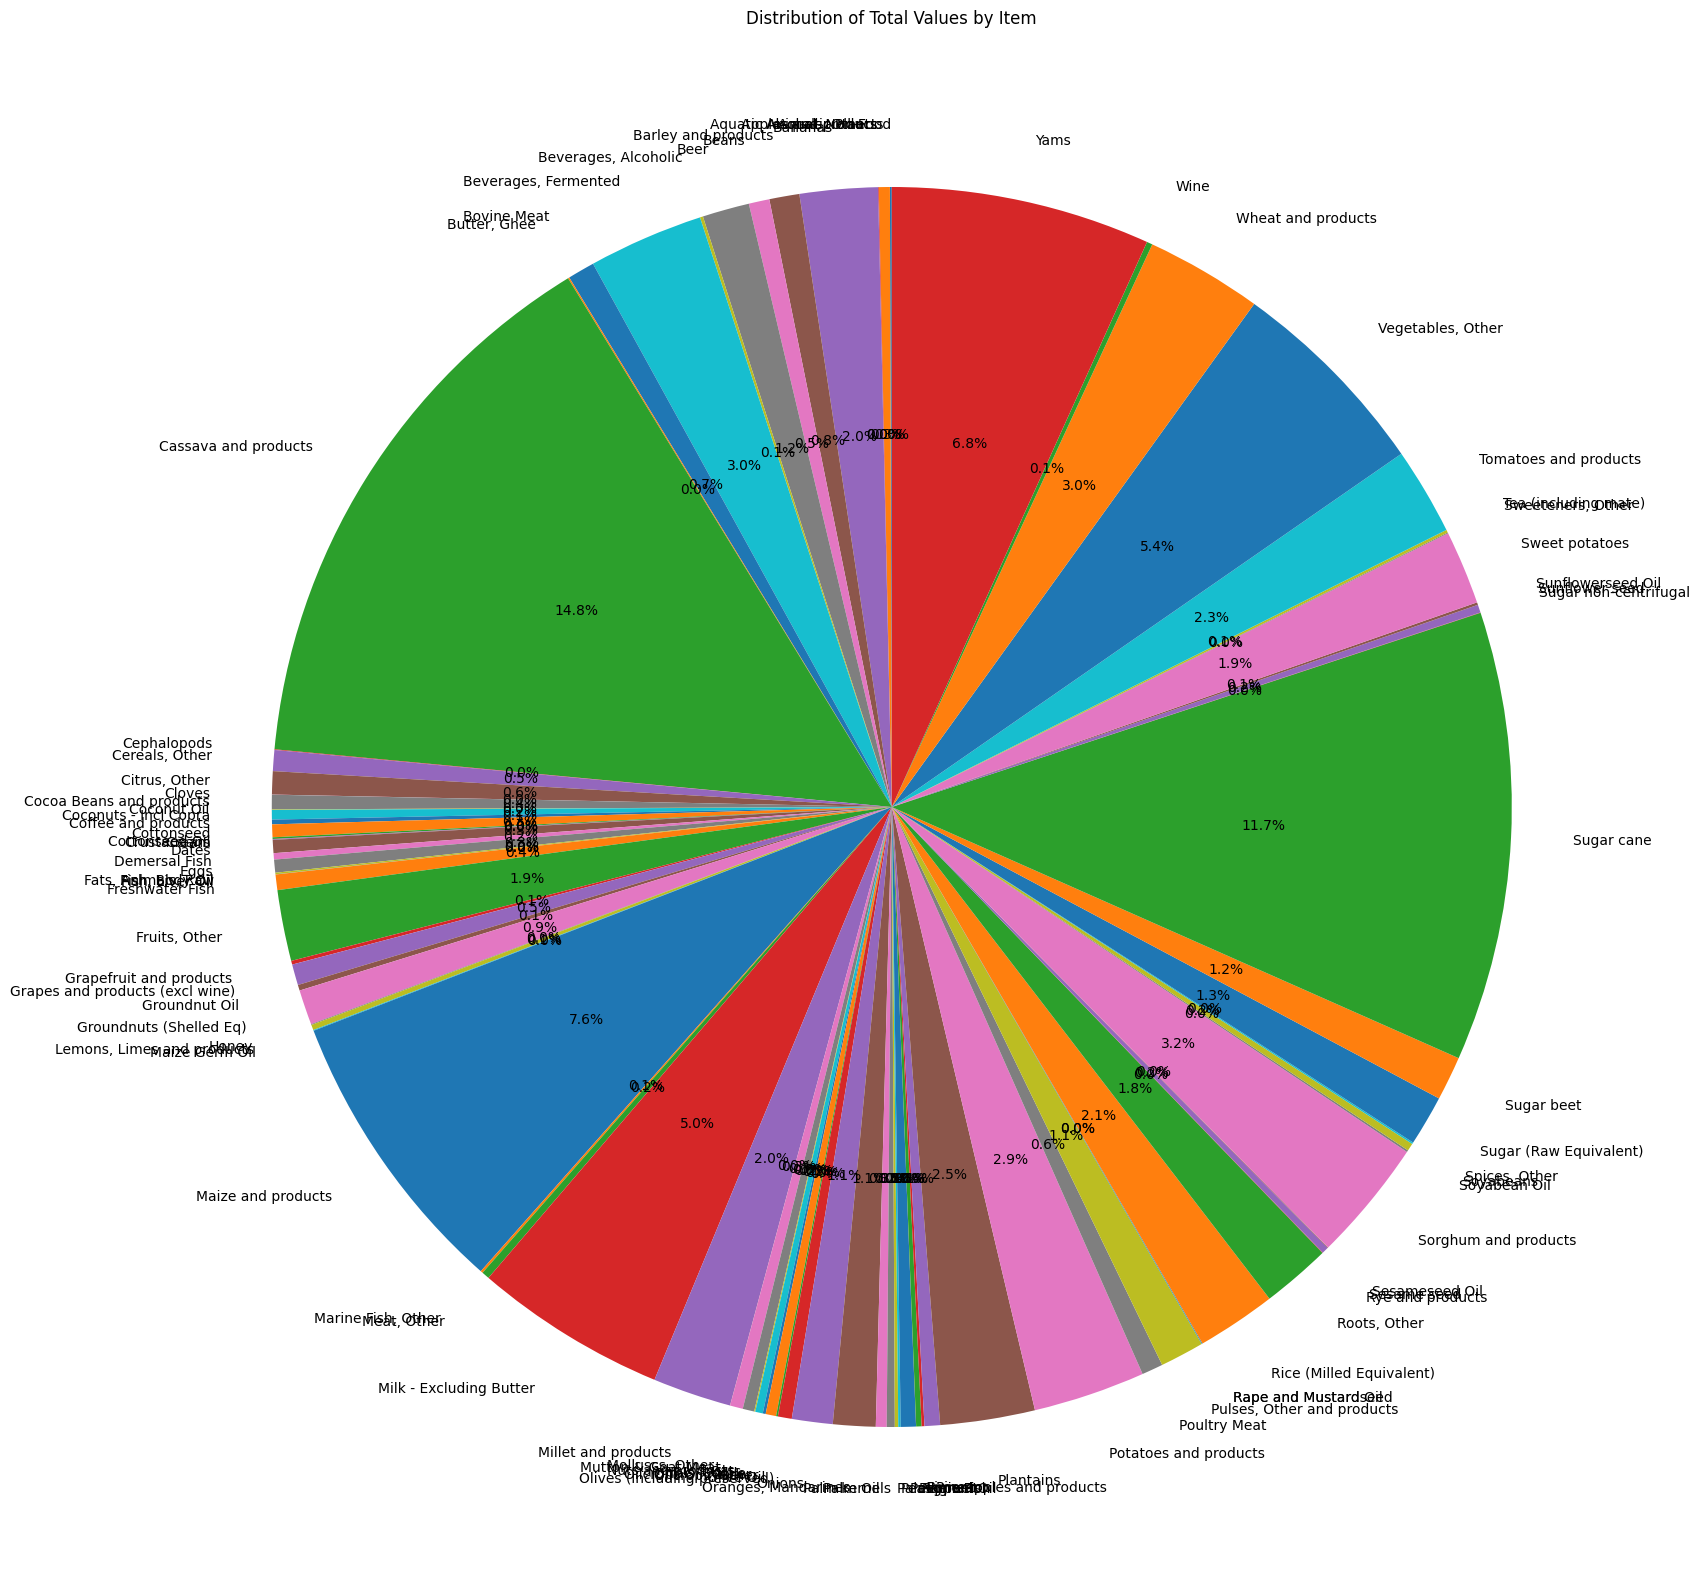

In [ ]:
plt.figure(figsize=(20, 30))  # Increase the figsize to make the pie chart larger
grouped_df.groupby("Item")["Value"].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Values by Item')
plt.ylabel('')  # Remove y-axis label for better presentation
plt.show()

In [ ]:
np.unique(grouped_df["Country"])

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe'], dtype=object)

**The PieChart below shows country that produced the higest value which is Nigeria followed by Egypt**

<ipython-input-46-c7d0afc3055a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df.groupby("Country").sum().Value.plot(kind='pie')


<Axes: ylabel='Value'>

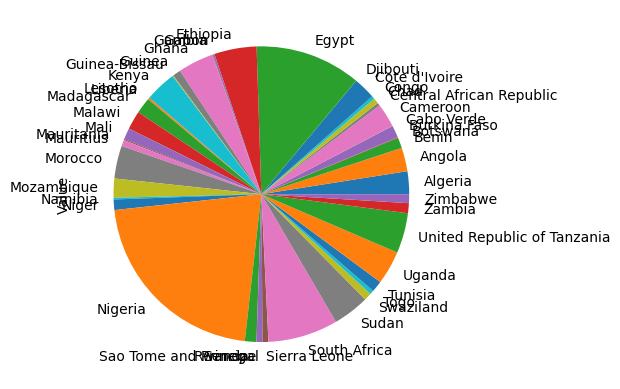

In [ ]:
grouped_df.groupby("Country").sum().Value.plot(kind='pie')

# Trends in Food Production from 2004 to 2013



<Axes: xlabel='Year', ylabel='Value'>

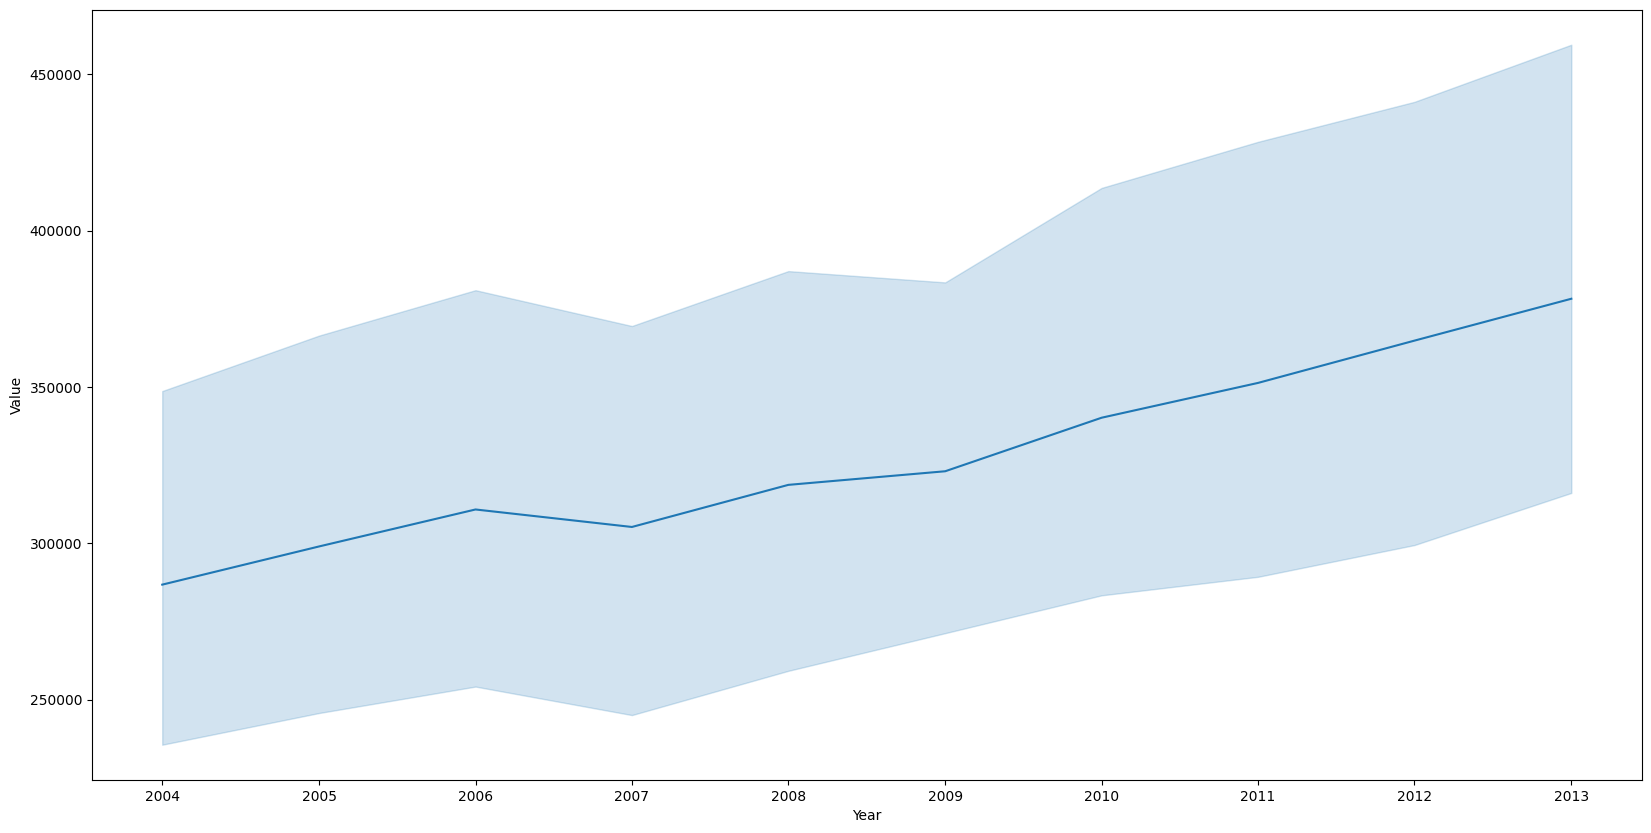

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data = grouped_df, x= 'Year', y = 'Value')

**The Chart above shows that year in, year out, production keeps increasing**

# Food Supply Analysis

## Import the food supply dataset

In [ ]:
dfs = pd.read_csv('/content/Africa Food Supply (2004 - 2013).csv')
dfs

Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]

### Data Info

In [ ]:
dfs.columns

Index(['Country', 'Year', 'Value'], dtype='object')

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [ ]:
dfs.describe()

Year        Value
count   450.000000   450.000000
mean   2008.500000  2469.775556
std       2.875478   379.140143
min    2004.000000  1781.000000
25%    2006.000000  2174.000000
50%    2008.500000  2376.000000
75%    2011.000000  2681.750000
max    2013.000000  3561.000000

In [ ]:
date = pd.to_datetime(dfs['Year'])
date

0     1970-01-01 00:00:00.000002004
1     1970-01-01 00:00:00.000002005
2     1970-01-01 00:00:00.000002006
3     1970-01-01 00:00:00.000002007
4     1970-01-01 00:00:00.000002008
                   ...             
445   1970-01-01 00:00:00.000002009
446   1970-01-01 00:00:00.000002010
447   1970-01-01 00:00:00.000002011
448   1970-01-01 00:00:00.000002012
449   1970-01-01 00:00:00.000002013
Name: Year, Length: 450, dtype: datetime64[ns]

In [ ]:
dfs['Date'] = pd.to_datetime(dfs['Year'], format='%Y')
dfs

Country  Year  Value       Date
0     Algeria  2004   2987 2004-01-01
1     Algeria  2005   2958 2005-01-01
2     Algeria  2006   3047 2006-01-01
3     Algeria  2007   3041 2007-01-01
4     Algeria  2008   3048 2008-01-01
..        ...   ...    ...        ...
445  Zimbabwe  2009   2147 2009-01-01
446  Zimbabwe  2010   2168 2010-01-01
447  Zimbabwe  2011   2200 2011-01-01
448  Zimbabwe  2012   2197 2012-01-01
449  Zimbabwe  2013   2110 2013-01-01

[450 rows x 4 columns]

In [ ]:
# Remove non-numeric characters and convert to numeric
dfs['Value'] = pd.to_numeric(dfs['Value'].replace('[^\d]', '', regex=True), errors='coerce')

In [ ]:
max_value = max(dfs['Value'])
max_value

3561

In [ ]:
max_value_index = dfs['Value'].idxmax()

In [ ]:
max_value_country = dfs.loc[dfs['Value'].idxmax(), 'Country']
print("Country with the highest value:", max_value_country)

Country with the highest value: Egypt


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000')])

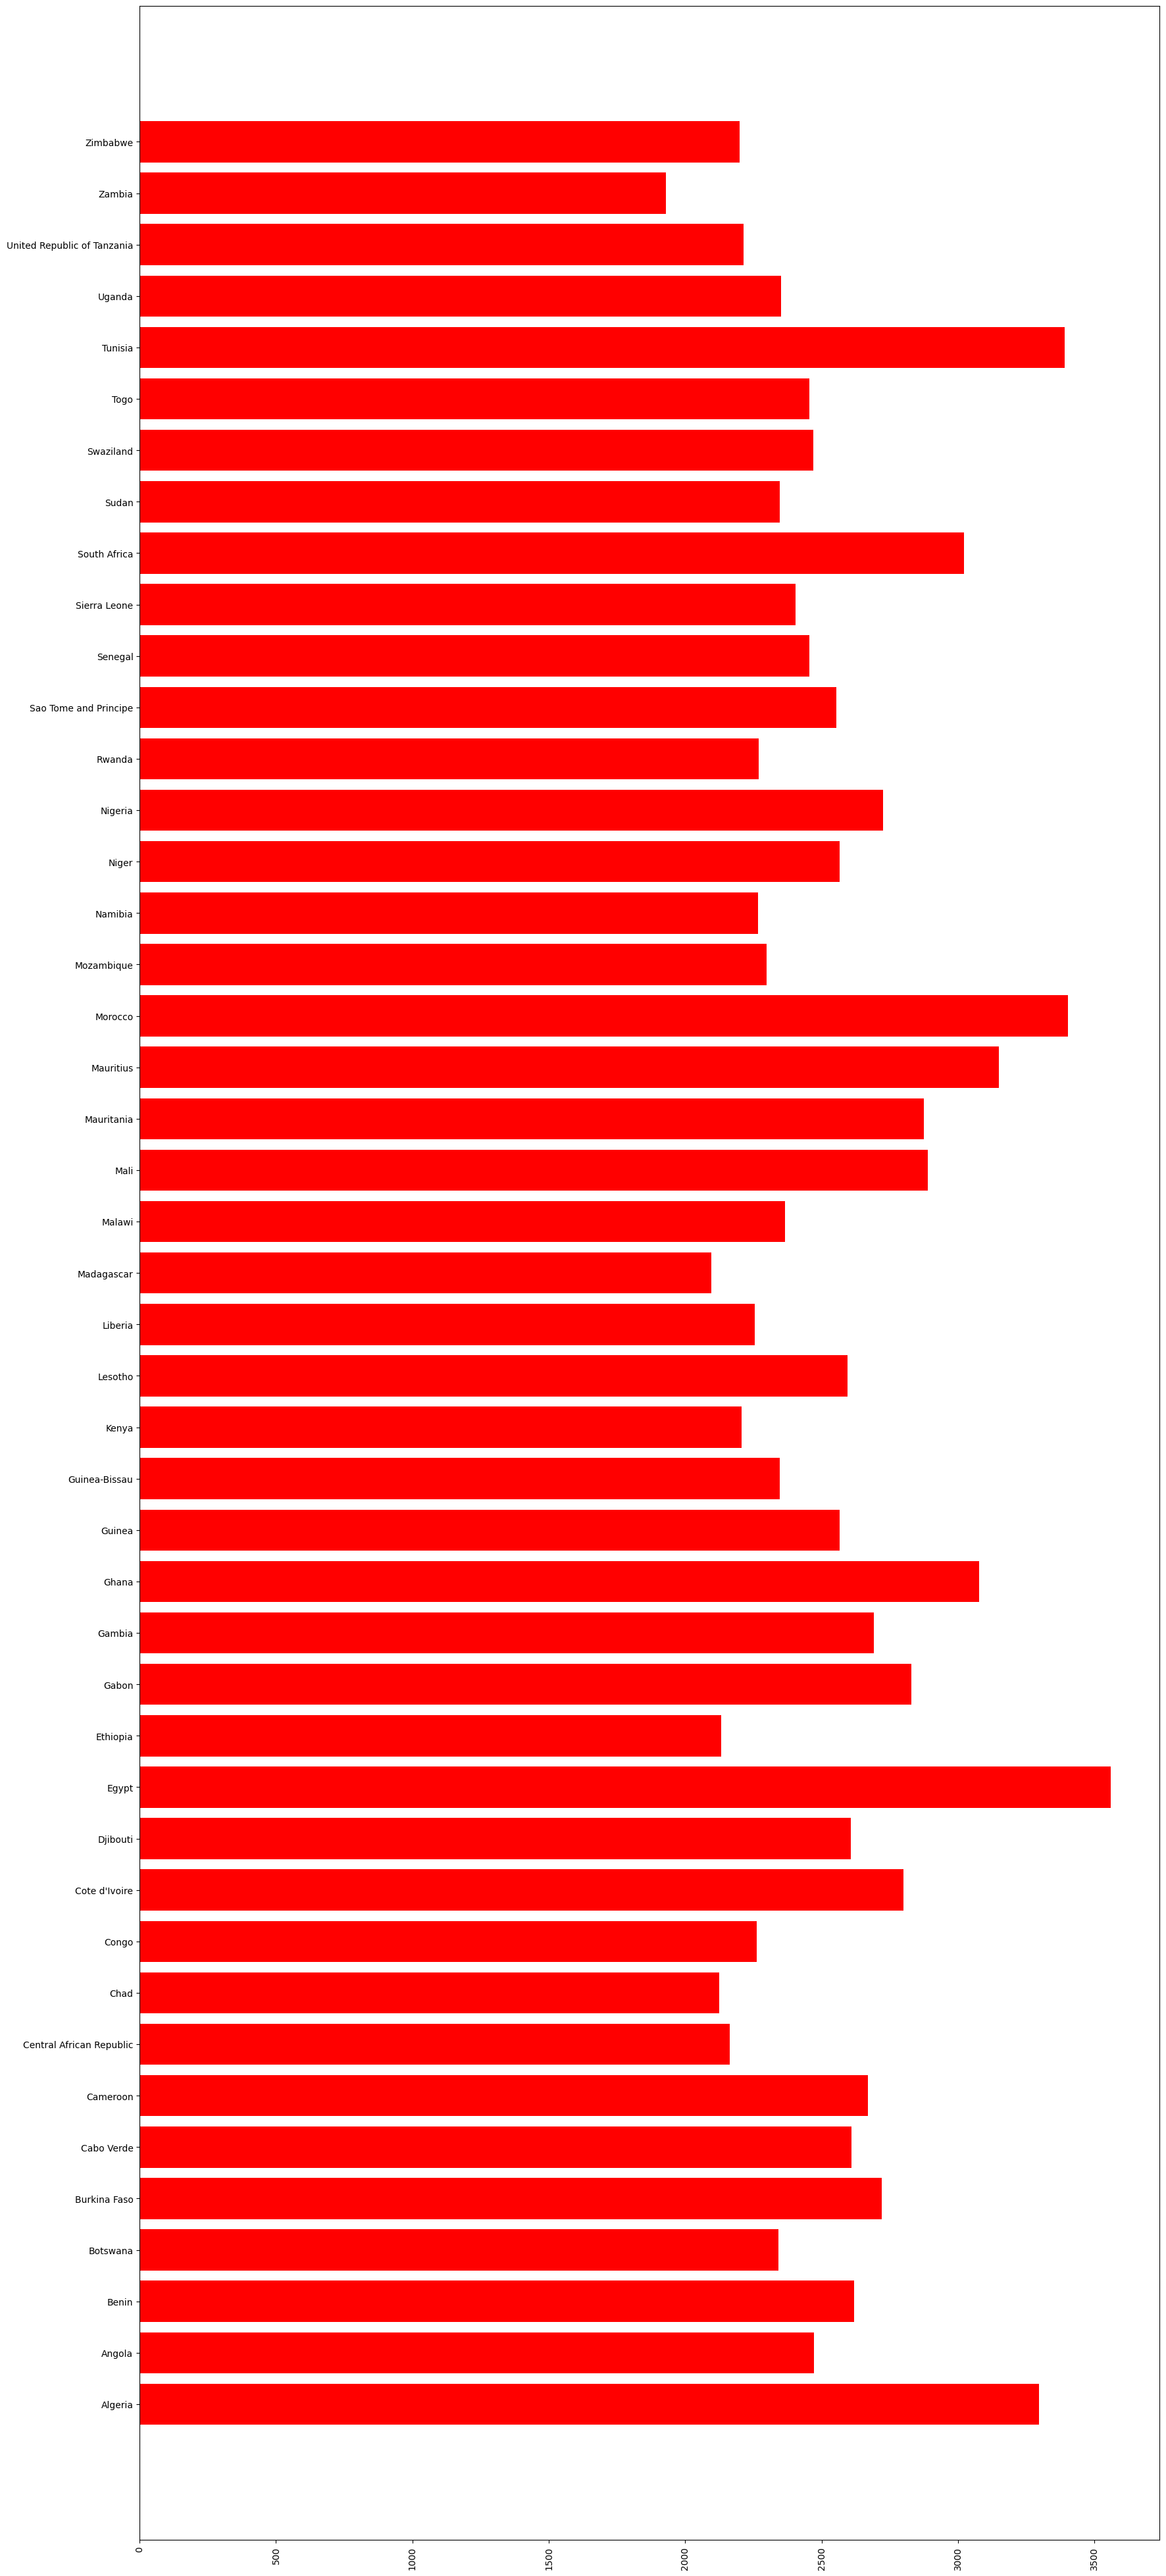

In [ ]:
fig = plt.figure(figsize=(20,50))
plt.barh(dfs['Country'],dfs['Value'], color='red')
plt.xticks(rotation=90)

In [ ]:
dfs_sort = dfs.sort_values(by = "Value", ascending = False).reset_index()
dfs_sort

index Country  Year  Value       Date
0      128   Egypt  2012   3561 2012-01-01
1      127   Egypt  2011   3549 2011-01-01
2      129   Egypt  2013   3522 2013-01-01
3      126   Egypt  2010   3507 2010-01-01
4      124   Egypt  2008   3490 2008-01-01
..     ...     ...   ...    ...        ...
445    431  Zambia  2005   1873 2005-01-01
446    430  Zambia  2004   1866 2004-01-01
447    432  Zambia  2006   1838 2006-01-01
448    434  Zambia  2008   1801 2008-01-01
449    433  Zambia  2007   1781 2007-01-01

[450 rows x 5 columns]

**Countries with the highest food supply**

Egypt, Morocco and Tunisia had the highest food supply per capital

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000')])

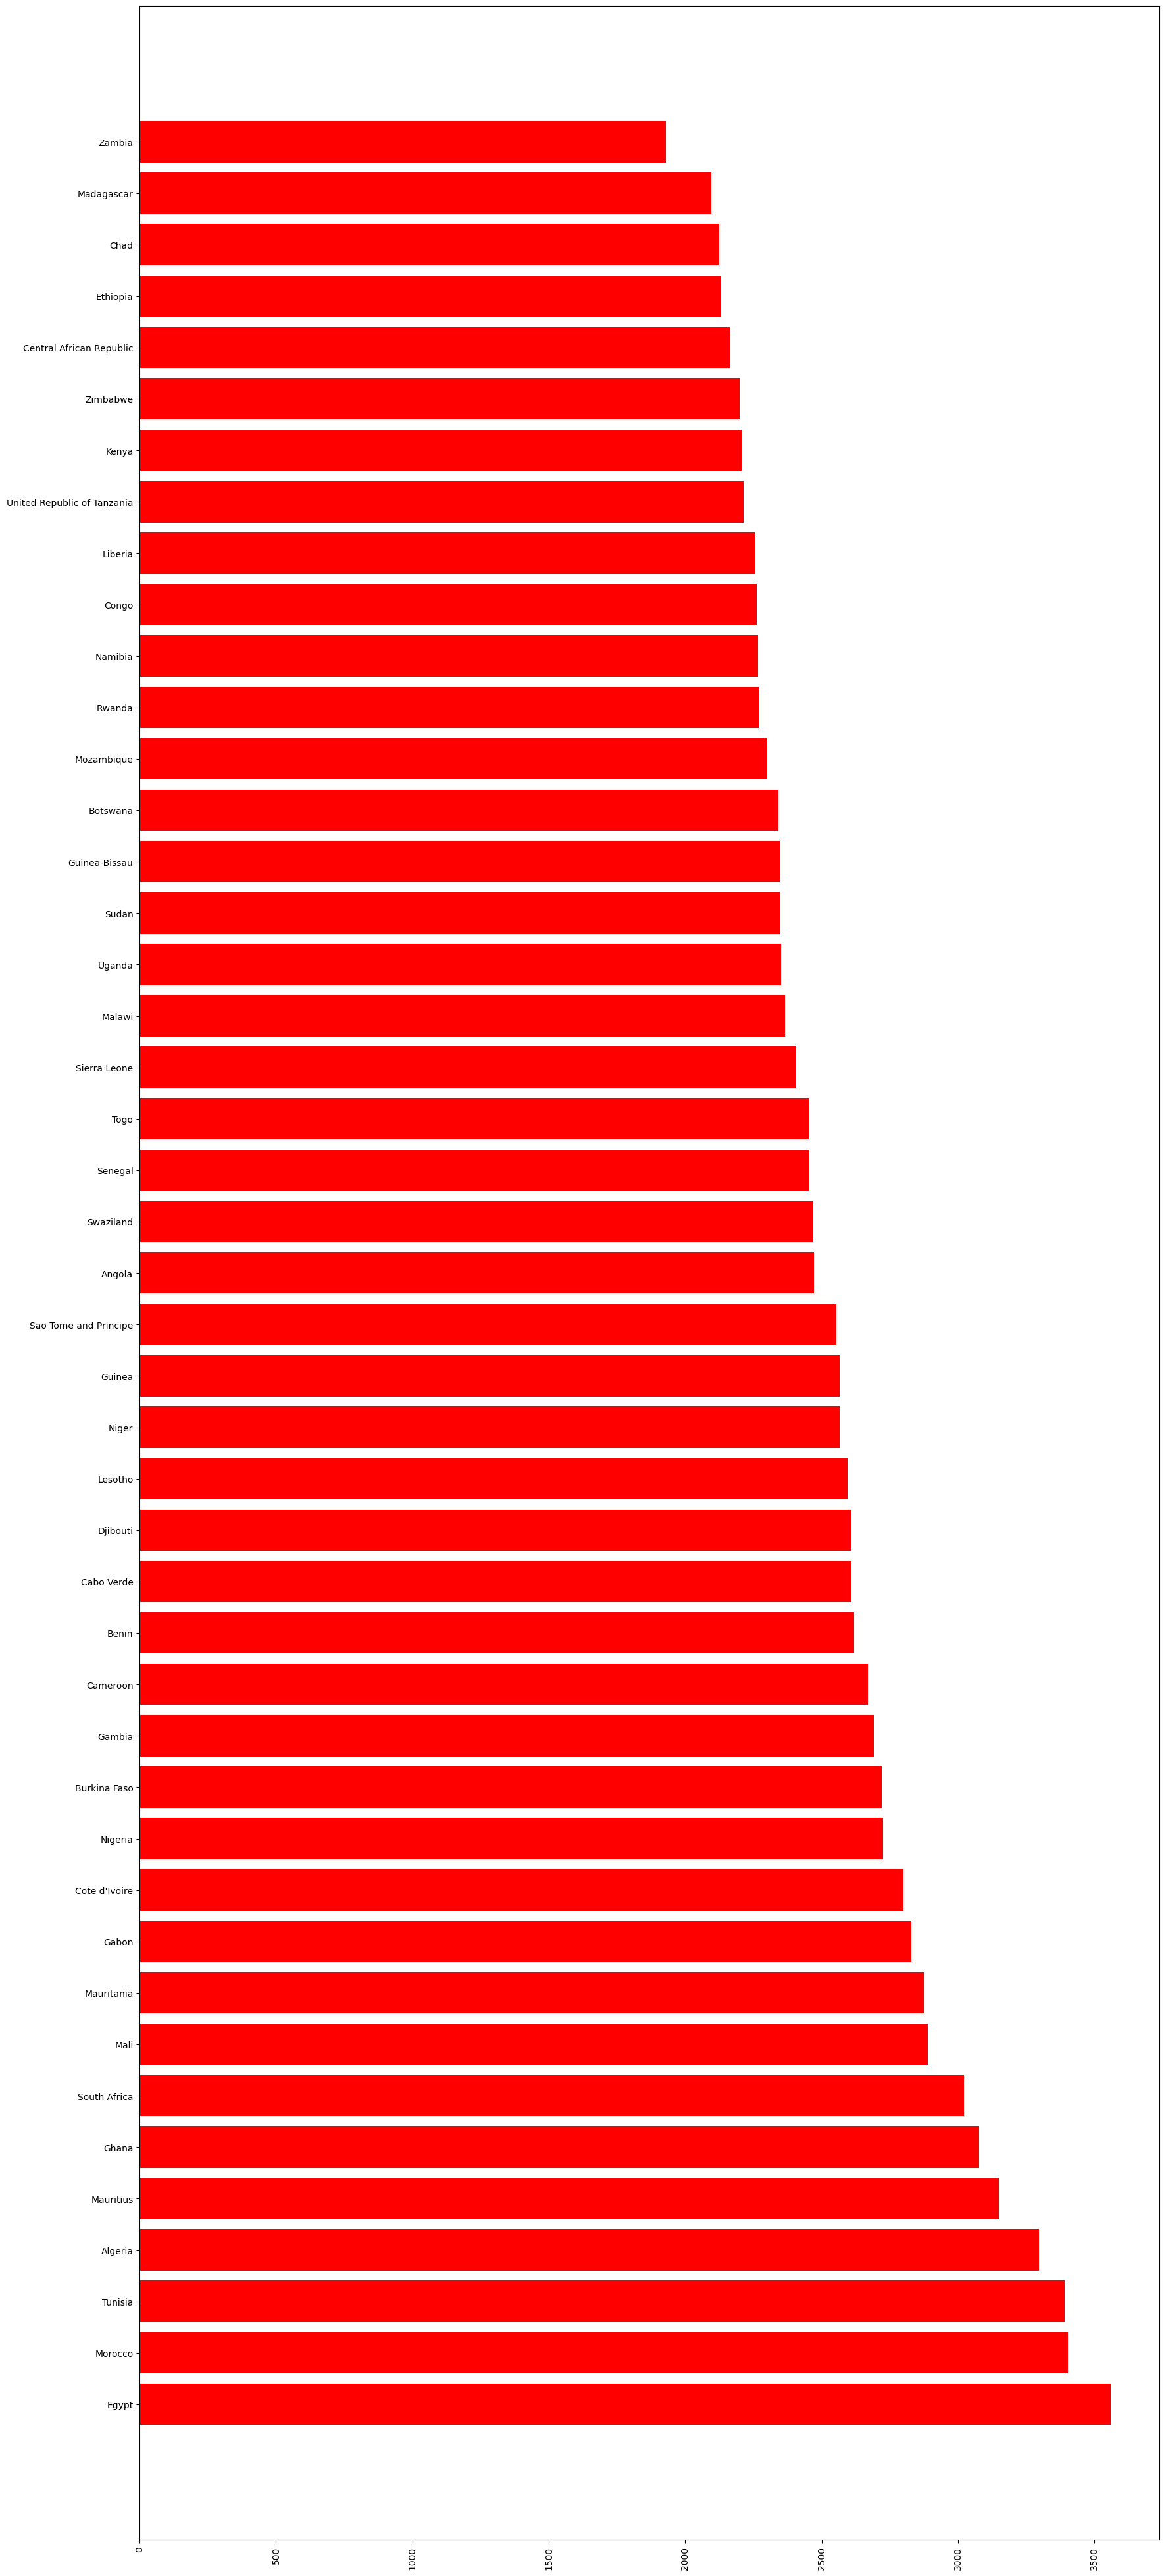

In [ ]:
fig = plt.figure(figsize=(20,50))
plt.barh(dfs_sort['Country'],dfs_sort['Value'], color='red')
plt.xticks(rotation=90)

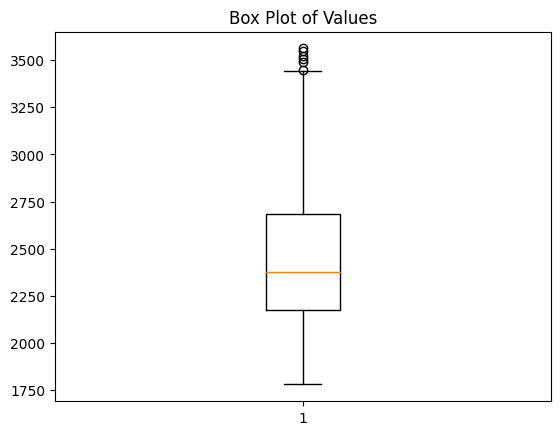

In [ ]:
plt.boxplot(dfs['Value'])
plt.title('Box Plot of Values')
plt.show()

**A Box Plot of African Countries from 2004-2013**

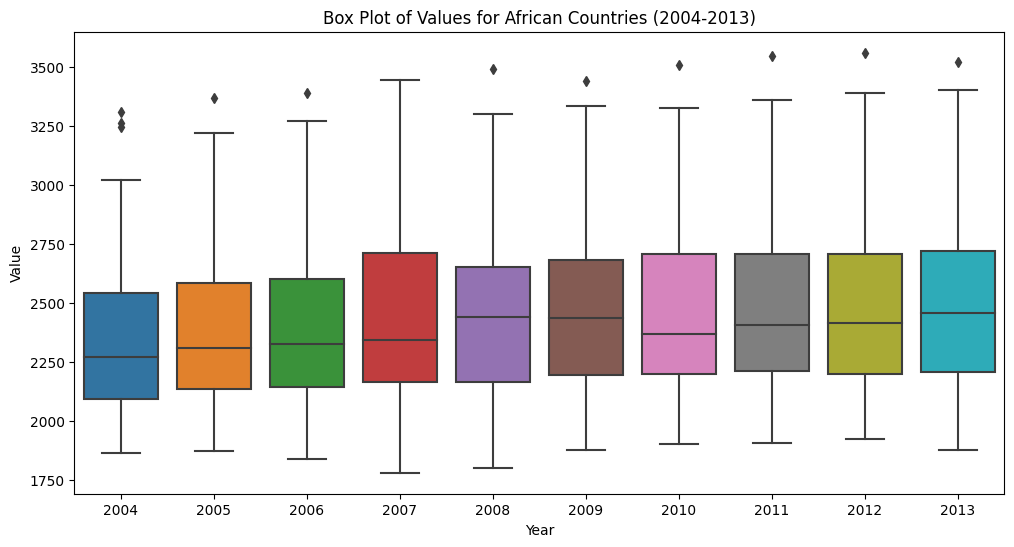

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Value', data=dfs)
plt.title('Box Plot of Values for African Countries (2004-2013)')
plt.show()

In [ ]:
filtered_dfs_2012 = dfs[dfs['Year'] == 2012]
filtered_dfs_2012

Country  Year  Value       Date
8                        Algeria  2012   3272 2012-01-01
18                        Angola  2012   2384 2012-01-01
28                         Benin  2012   2610 2012-01-01
38                      Botswana  2012   2342 2012-01-01
48                  Burkina Faso  2012   2707 2012-01-01
58                    Cabo Verde  2012   2590 2012-01-01
68                      Cameroon  2012   2622 2012-01-01
78      Central African Republic  2012   2116 2012-01-01
88                          Chad  2012   2124 2012-01-01
98                         Congo  2012   2158 2012-01-01
108                Cote d'Ivoire  2012   2780 2012-01-01
118                     Djibouti  2012   2545 2012-01-01
128                        Egypt  2012   3561 2012-01-01
138                     Ethiopia  2012   2124 2012-01-01
148                        Gabon  2012   2795 2012-01-01
158                       Gambia  2012   2652 2012-01-01
168                        Ghana  2012   3043 2012-01-01
178                       Guinea  2012   2561 2012-01-01
188                Guinea-Bissau  2012   2331 2012-01-01
198                        Kenya  2012   2192 2012-01-01
208                      Lesotho  2012   2547 2012-01-01
218                      Liberia  2012   2200 2012-01-01
228                   Madagascar  2012   2058 2012-01-01
238                       Malawi  2012   2333 2012-01-01
248                         Mali  2012   2860 2012-01-01
258                   Mauritania  2012   2873 2012-01-01
268                    Mauritius  2012   3014 2012-01-01
278                      Morocco  2012   3366 2012-01-01
288                   Mozambique  2012   2298 2012-01-01
298                      Namibia  2012   2145 2012-01-01
308                        Niger  2012   2567 2012-01-01
318                      Nigeria  2012   2665 2012-01-01
328                       Rwanda  2012   2270 2012-01-01
338        Sao Tome and Principe  2012   2338 2012-01-01
348                      Senegal  2012   2443 2012-01-01
358                 Sierra Leone  2012   2374 2012-01-01
368                 South Africa  2012   3014 2012-01-01
370                        Sudan  2012   2301 2012-01-01
388                    Swaziland  2012   2293 2012-01-01
398                         Togo  2012   2414 2012-01-01
408                      Tunisia  2012   3390 2012-01-01
418                       Uganda  2012   2160 2012-01-01
428  United Republic of Tanzania  2012   2192 2012-01-01
438                       Zambia  2012   1923 2012-01-01
448                     Zimbabwe  2012   2197 2012-01-01

In [ ]:
print(filtered_dfs_2012.dtypes)

Country            object
Year                int64
Value               int64
Date       datetime64[ns]
dtype: object


Value is float, I need to convert it to numeric

In [ ]:
filtered_dfs_2012['Value'] = pd.to_numeric(filtered_dfs_2012['Value'], errors='coerce')

<ipython-input-143-02f237660c4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dfs_2012['Value'] = pd.to_numeric(filtered_dfs_2012['Value'], errors='coerce')


The errors='coerce' parameter will replace any non-numeric values with NaN.

Now I need to check for missing values

In [ ]:
filtered_dfs_2012 = filtered_dfs_2012.dropna(subset=['Value'])
filtered_dfs_2012

Country  Year  Value       Date
8                        Algeria  2012   3272 2012-01-01
18                        Angola  2012   2384 2012-01-01
28                         Benin  2012   2610 2012-01-01
38                      Botswana  2012   2342 2012-01-01
48                  Burkina Faso  2012   2707 2012-01-01
58                    Cabo Verde  2012   2590 2012-01-01
68                      Cameroon  2012   2622 2012-01-01
78      Central African Republic  2012   2116 2012-01-01
88                          Chad  2012   2124 2012-01-01
98                         Congo  2012   2158 2012-01-01
108                Cote d'Ivoire  2012   2780 2012-01-01
118                     Djibouti  2012   2545 2012-01-01
128                        Egypt  2012   3561 2012-01-01
138                     Ethiopia  2012   2124 2012-01-01
148                        Gabon  2012   2795 2012-01-01
158                       Gambia  2012   2652 2012-01-01
168                        Ghana  2012   3043 2012-01-01
178                       Guinea  2012   2561 2012-01-01
188                Guinea-Bissau  2012   2331 2012-01-01
198                        Kenya  2012   2192 2012-01-01
208                      Lesotho  2012   2547 2012-01-01
218                      Liberia  2012   2200 2012-01-01
228                   Madagascar  2012   2058 2012-01-01
238                       Malawi  2012   2333 2012-01-01
248                         Mali  2012   2860 2012-01-01
258                   Mauritania  2012   2873 2012-01-01
268                    Mauritius  2012   3014 2012-01-01
278                      Morocco  2012   3366 2012-01-01
288                   Mozambique  2012   2298 2012-01-01
298                      Namibia  2012   2145 2012-01-01
308                        Niger  2012   2567 2012-01-01
318                      Nigeria  2012   2665 2012-01-01
328                       Rwanda  2012   2270 2012-01-01
338        Sao Tome and Principe  2012   2338 2012-01-01
348                      Senegal  2012   2443 2012-01-01
358                 Sierra Leone  2012   2374 2012-01-01
368                 South Africa  2012   3014 2012-01-01
370                        Sudan  2012   2301 2012-01-01
388                    Swaziland  2012   2293 2012-01-01
398                         Togo  2012   2414 2012-01-01
408                      Tunisia  2012   3390 2012-01-01
418                       Uganda  2012   2160 2012-01-01
428  United Republic of Tanzania  2012   2192 2012-01-01
438                       Zambia  2012   1923 2012-01-01
448                     Zimbabwe  2012   2197 2012-01-01

**Outlier Value in year 2012**

In [ ]:
# Assuming you have a DataFrame 'filtered_df_2012' with a 'Value' column
# Replace 'Value' with the actual column name in your DataFrame
values_2012 = filtered_dfs_2012['Value']

# Calculate quartiles and IQR
q1 = values_2012.quantile(0.25)
q3 = values_2012.quantile(0.75)
iqr_value = q3 - q1

# Calculate Tukey's fences
lower_fence = q1 - 1.5 * iqr_value
upper_fence = q3 + 1.5 * iqr_value

# Identify outliers
outliers = filtered_dfs_2012[(values_2012 < lower_fence) | (values_2012 > upper_fence)]

# Get the actual values of outliers
outliers_values = outliers['Value'].tolist()

# Print the values
print("Outliers values:", outliers_values)

Outliers values: [3561]


**Total Value of Items produced by Countries**

In [ ]:
total_by_country = dfs.groupby("Country")["Value"].sum().reset_index()
total_by_country

Country  Value
0                       Algeria  31118
1                        Angola  22556
2                         Benin  25378
3                      Botswana  22263
4                  Burkina Faso  26072
5                    Cabo Verde  25514
6                      Cameroon  24603
7      Central African Republic  20719
8                          Chad  20511
9                         Congo  21530
10                Cote d'Ivoire  27666
11                     Djibouti  24165
12                        Egypt  34580
13                     Ethiopia  20292
14                        Gabon  27299
15                       Gambia  25695
16                        Ghana  29180
17                       Guinea  25180
18                Guinea-Bissau  22963
19                        Kenya  21453
20                      Lesotho  25588
21                      Liberia  21827
22                   Madagascar  20608
23                       Malawi  22925
24                         Mali  27502
25                   Mauritania  27443
26                    Mauritius  30543
27                      Morocco  32967
28                   Mozambique  21702
29                      Namibia  21602
30                        Niger  25024
31                      Nigeria  26988
32                       Rwanda  21309
33        Sao Tome and Principe  24462
34                      Senegal  23784
35                 Sierra Leone  22291
36                 South Africa  29629
37                        Sudan  23238
38                    Swaziland  23171
39                         Togo  23339
40                      Tunisia  33055
41                       Uganda  22205
42  United Republic of Tanzania  21550
43                       Zambia  18701
44                     Zimbabwe  21209

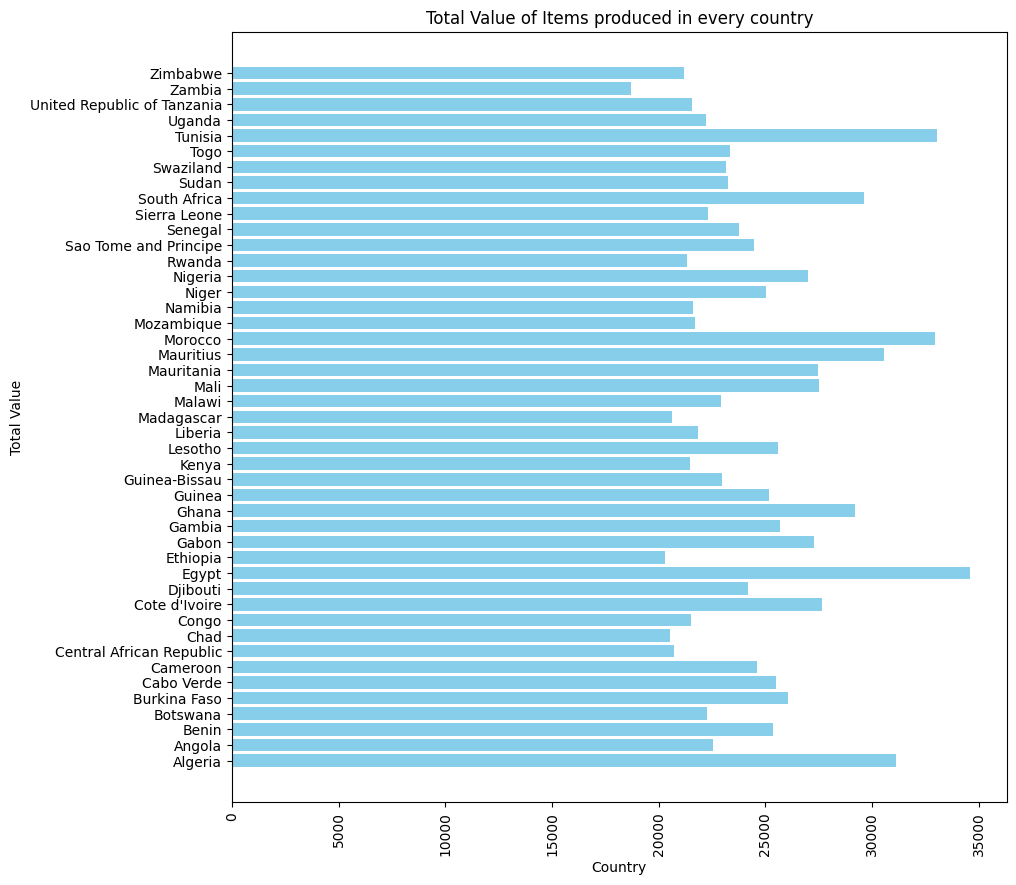

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(total_by_country['Country'], total_by_country['Value'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.title('Total Value of Items produced in every country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**Egypt has the highest food supply folowed by Tunisia**

In [ ]:
Max_Value = max(dfs['Value'])
Max_Value

3561

In [ ]:
max_value_country = dfs.loc[dfs['Value'].idxmax(), 'Country']
print("Country with the highest value:", max_value_country)

Country with the highest value: Egypt


In [ ]:
grouped_dfs = dfs.groupby(["Country", "Year"]).sum().reset_index()
grouped_dfs

<ipython-input-153-ec3cd9e401fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_dfs = dfs.groupby(["Country", "Year"]).sum().reset_index()


Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]

<Axes: xlabel='Year', ylabel='Value'>

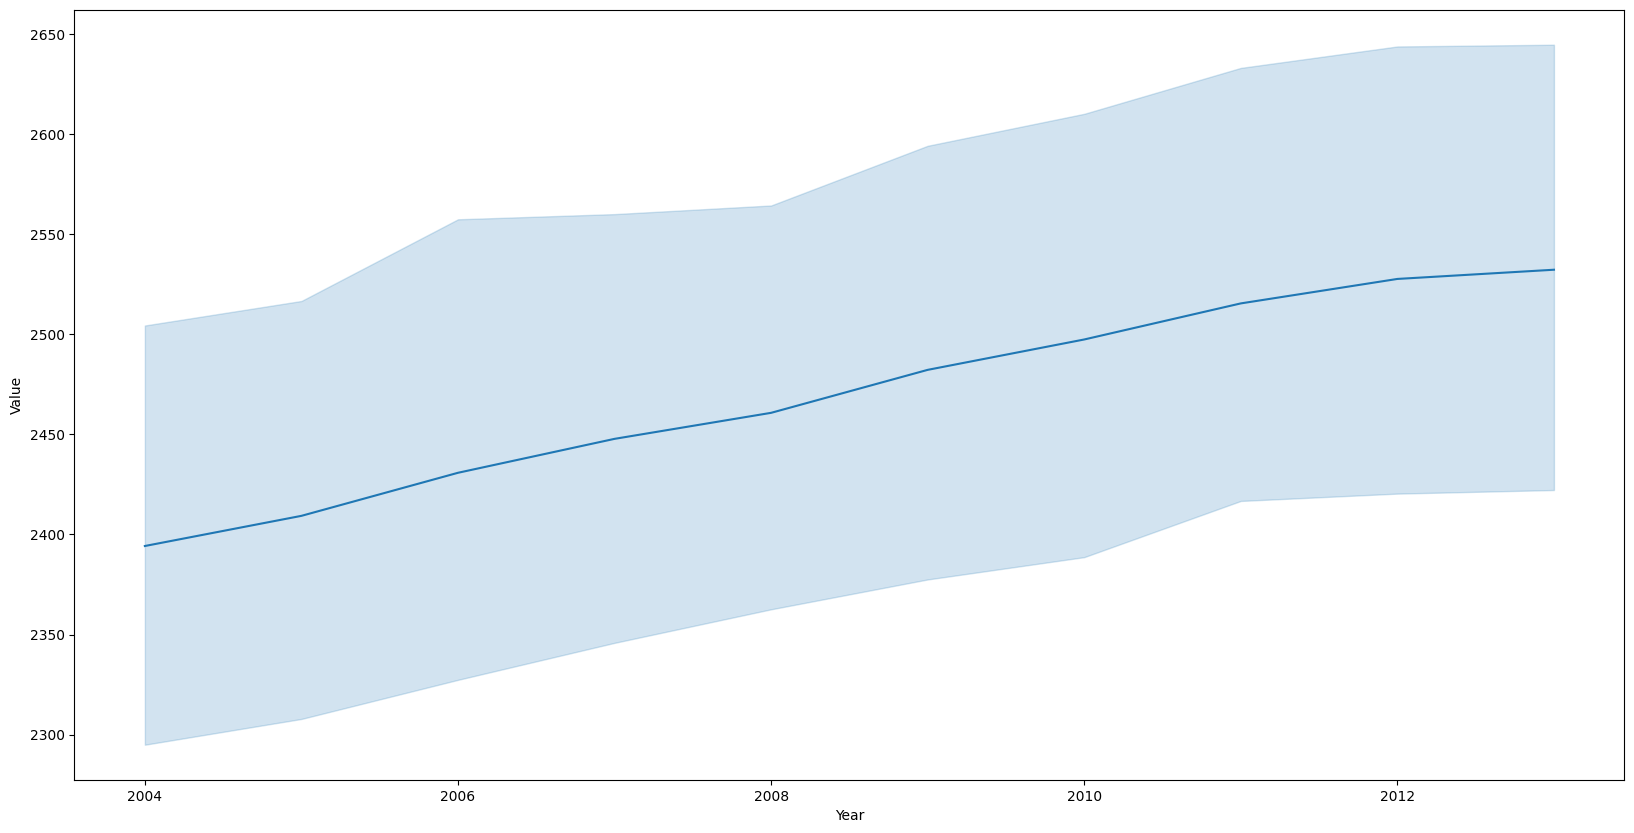

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data = grouped_dfs, x= 'Year', y = 'Value')

# Use and Test of Hypothesis

Using the Pearson hypothesis test we can determine whether the Pearson's correlation coefficient, ρ (Greek small letter rho) is “near 0” or “significantly far from 0”, based on the sample correlation coefficient, r and the sample size n.

If my test shows that ρ is significantly far from 0, then you can say that it is “significant”. However, if the test concludes that ρ is not significantly far from (i.e., near 0), then you say that is “not significant”.

Does the rice production in Africa, as a continent, increase as its population rises? In other words, is there a correlation between the amount of rice produced in the whole of Africa (in kt) and its population?

We can formulate a hypothesis to test if this claim is true.

Using the Pearson Correlation Test, I want to see the correlation between the total amount of rice produced in Africa and its population size.

**I will be using the World population datset gotten from kaggle**

**Import the World population Dataset**

In [ ]:
world_data = pd.read_csv('/content/world_pop.csv')
world_data

Unnamed: 0                country   year_1960   year_1961   year_1962  \
0             1            Afghanistan   8996967.0   9169406.0   9351442.0   
1             2                Albania   1608800.0   1659800.0   1711319.0   
2             3                Algeria  11057864.0  11336336.0  11619828.0   
3             4         American Samoa     20127.0     20605.0     21246.0   
4             5                Andorra     13410.0     14378.0     15379.0   
..          ...                    ...         ...         ...         ...   
211         212  Virgin Islands (U.S.)     32500.0     34300.0     35000.0   
212         213     West Bank and Gaza         NaN         NaN         NaN   
213         214            Yemen, Rep.   5315351.0   5393034.0   5473671.0   
214         215                 Zambia   3070780.0   3164330.0   3260645.0   
215         216               Zimbabwe   3776679.0   3905038.0   4039209.0   

      year_1963   year_1964   year_1965   year_1966   year_1967  ...  \
0     9543200.0   9744772.0   9956318.0  10174840.0  10399936.0  ...   
1     1762621.0   1814135.0   1864791.0   1914573.0   1965598.0  ...   
2    11912800.0  12221675.0  12550880.0  12902626.0  13275020.0  ...   
3       22029.0     22850.0     23675.0     24473.0     25235.0  ...   
4       16407.0     17466.0     18542.0     19646.0     20760.0  ...   
..          ...         ...         ...         ...         ...  ...   
211     39800.0     40800.0     43500.0     46200.0     49100.0  ...   
212         NaN         NaN         NaN         NaN         NaN  ...   
213   5556767.0   5641598.0   5727745.0   5816241.0   5907873.0  ...   
214   3360099.0   3463211.0   3570466.0   3681953.0   3797877.0  ...   
215   4178726.0   4322854.0   4471178.0   4623340.0   4779825.0  ...   

     year_2011   year_2012   year_2013   year_2014   year_2015   year_2016  \
0     30117411  31161378.0  32269592.0  33370804.0  34413603.0  35383028.0   
1      2905195   2900401.0   2895092.0   2889104.0   2880703.0   2876101.0   
2     36661438  37383899.0  38140135.0  38923688.0  39728020.0  40551398.0   
3        55755     55669.0     55717.0     55791.0     55806.0     55739.0   
4        83748     82427.0     80770.0     79213.0     77993.0     77295.0   
..         ...         ...         ...         ...         ...         ...   
211     108290    108188.0    108041.0    107882.0    107712.0    107516.0   
212    3882986   3979998.0   4076708.0   4173398.0   4270092.0   4367088.0   
213   23807586  24473176.0  25147112.0  25823488.0  26497881.0  27168210.0   
214   14023199  14465148.0  14926551.0  15399793.0  15879370.0  16363449.0   
215   12894323  13115149.0  13350378.0  13586710.0  13814642.0  14030338.0   

      year_2017   year_2018   year_2019   year_2020  
0    36296111.0  37171922.0  38041757.0  38928341.0  
1     2873457.0   2866376.0   2854191.0   2837743.0  
2    41389174.0  42228415.0  43053054.0  43851043.0  
3       55617.0     55461.0     55312.0     55197.0  
4       76997.0     77008.0     77146.0     77265.0  
..          ...         ...         ...         ...  
211    107281.0    107001.0    106669.0    106290.0  
212   4454805.0   4569087.0   4685306.0   4803269.0  
213  27834811.0  28498683.0  29161922.0  29825968.0  
214  16853608.0  17351714.0  17861034.0  18383956.0  
215  14236599.0  14438812.0  14645473.0  14862927.0  

[216 rows x 63 columns]

In [ ]:
world_data.columns

Index(['Unnamed: 0', 'country', 'year_1960', 'year_1961', 'year_1962',
       'year_1963', 'year_1964', 'year_1965', 'year_1966', 'year_1967',
       'year_1968', 'year_1969', 'year_1970', 'year_1971', 'year_1972',
       'year_1973', 'year_1974', 'year_1975', 'year_1976', 'year_1977',
       'year_1978', 'year_1979', 'year_1980', 'year_1981', 'year_1982',
       'year_1983', 'year_1984', 'year_1985', 'year_1986', 'year_1987',
       'year_1988', 'year_1989', 'year_1990', 'year_1991', 'year_1992',
       'year_1993', 'year_1994', 'year_1995', 'year_1996', 'year_1997',
       'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'year_2020'],
      dtype='object')

In [ ]:
world_data.head()

Unnamed: 0         country   year_1960   year_1961   year_1962   year_1963  \
0           1     Afghanistan   8996967.0   9169406.0   9351442.0   9543200.0   
1           2         Albania   1608800.0   1659800.0   1711319.0   1762621.0   
2           3         Algeria  11057864.0  11336336.0  11619828.0  11912800.0   
3           4  American Samoa     20127.0     20605.0     21246.0     22029.0   
4           5         Andorra     13410.0     14378.0     15379.0     16407.0   

    year_1964   year_1965   year_1966   year_1967  ...  year_2011   year_2012  \
0   9744772.0   9956318.0  10174840.0  10399936.0  ...   30117411  31161378.0   
1   1814135.0   1864791.0   1914573.0   1965598.0  ...    2905195   2900401.0   
2  12221675.0  12550880.0  12902626.0  13275020.0  ...   36661438  37383899.0   
3     22850.0     23675.0     24473.0     25235.0  ...      55755     55669.0   
4     17466.0     18542.0     19646.0     20760.0  ...      83748     82427.0   

    year_2013   year_2014   year_2015   year_2016   year_2017   year_2018  \
0  32269592.0  33370804.0  34413603.0  35383028.0  36296111.0  37171922.0   
1   2895092.0   2889104.0   2880703.0   2876101.0   2873457.0   2866376.0   
2  38140135.0  38923688.0  39728020.0  40551398.0  41389174.0  42228415.0   
3     55717.0     55791.0     55806.0     55739.0     55617.0     55461.0   
4     80770.0     79213.0     77993.0     77295.0     76997.0     77008.0   

    year_2019   year_2020  
0  38041757.0  38928341.0  
1   2854191.0   2837743.0  
2  43053054.0  43851043.0  
3     55312.0     55197.0  
4     77146.0     77265.0  

[5 rows x 63 columns]

In [ ]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  216 non-null    int64  
 1   country     216 non-null    object 
 2   year_1960   215 non-null    float64
 3   year_1961   215 non-null    float64
 4   year_1962   215 non-null    float64
 5   year_1963   215 non-null    float64
 6   year_1964   215 non-null    float64
 7   year_1965   215 non-null    float64
 8   year_1966   215 non-null    float64
 9   year_1967   215 non-null    float64
 10  year_1968   215 non-null    float64
 11  year_1969   215 non-null    float64
 12  year_1970   215 non-null    float64
 13  year_1971   215 non-null    float64
 14  year_1972   215 non-null    float64
 15  year_1973   215 non-null    float64
 16  year_1974   215 non-null    float64
 17  year_1975   215 non-null    float64
 18  year_1976   215 non-null    float64
 19  year_1977   215 non-null    f

In [ ]:
world_data.describe()

Unnamed: 0     year_1960     year_1961     year_1962     year_1963  \
count     216.000  2.150000e+02  2.150000e+02  2.150000e+02  2.150000e+02   
mean      108.500  1.405277e+07  1.423448e+07  1.447906e+07  1.478000e+07   
std        62.498  5.758055e+07  5.765356e+07  5.838399e+07  5.970761e+07   
min         1.000  2.833000e+03  3.077000e+03  3.367000e+03  3.703000e+03   
25%        54.750  2.431615e+05  2.452520e+05  2.483855e+05  2.532670e+05   
50%       108.500  2.371800e+06  2.419700e+06  2.482000e+06  2.531800e+06   
75%       162.250  8.126535e+06  8.287510e+06  8.400080e+06  8.458428e+06   
max       216.000  6.670700e+08  6.603300e+08  6.657700e+08  6.823350e+08   

          year_1964     year_1965     year_1966     year_1967     year_1968  \
count  2.150000e+02  2.150000e+02  2.150000e+02  2.150000e+02  2.150000e+02   
mean   1.508275e+07  1.539201e+07  1.571588e+07  1.603857e+07  1.636799e+07   
std    6.101401e+07  6.237132e+07  6.390821e+07  6.539956e+07  6.694701e+07   
min    4.063000e+03  4.460000e+03  4.675000e+03  4.922000e+03  5.194000e+03   
25%    2.587885e+05  2.651445e+05  2.725850e+05  2.808650e+05  2.890735e+05   
50%    2.585400e+06  2.628400e+06  2.675900e+06  2.736500e+06  2.791588e+06   
75%    8.517326e+06  8.690047e+06  8.813743e+06  8.910958e+06  9.067620e+06   
max    6.983550e+08  7.151850e+08  7.354000e+08  7.545500e+08  7.745100e+08   

       ...     year_2011     year_2012     year_2013     year_2014  \
count  ...  2.160000e+02  2.150000e+02  2.150000e+02  2.150000e+02   
mean   ...  3.231268e+07  3.283310e+07  3.322273e+07  3.361593e+07   
std    ...  1.292284e+08  1.306353e+08  1.317467e+08  1.328593e+08   
min    ...  1.006900e+04  1.013600e+04  1.020800e+04  1.028900e+04   
25%    ...  7.406662e+05  7.396265e+05  7.503960e+05  7.613805e+05   
50%    ...  6.056801e+06  6.237922e+06  6.266076e+06  6.295124e+06   
75%    ...  2.104194e+07  2.151623e+07  2.208240e+07  2.266476e+07   
max    ...  1.344130e+09  1.350695e+09  1.357380e+09  1.364270e+09   

          year_2015     year_2016     year_2017     year_2018     year_2019  \
count  2.150000e+02  2.150000e+02  2.150000e+02  2.150000e+02  2.150000e+02   
mean   3.400980e+07  3.440666e+07  3.480128e+07  3.518734e+07  3.556319e+07   
std    1.339685e+08  1.350943e+08  1.362226e+08  1.372753e+08  1.382558e+08   
min    1.037400e+04  1.047400e+04  1.057700e+04  1.067800e+04  1.076400e+04   
25%    7.724340e+05  7.834800e+05  7.945540e+05  8.056645e+05  8.168330e+05   
50%    6.418315e+06  6.492160e+06  6.580723e+06  6.678565e+06  6.777453e+06   
75%    2.326226e+07  2.387464e+07  2.450177e+07  2.502596e+07  2.551595e+07   
max    1.371220e+09  1.378665e+09  1.386395e+09  1.392730e+09  1.397715e+09   

          year_2020  
count  2.150000e+02  
mean   3.593273e+07  
std    1.391982e+08  
min    1.083400e+04  
25%    8.280770e+05  
50%    6.825442e+06  
75%    2.573293e+07  
max    1.402112e+09  

[8 rows x 62 columns]

**I only need the population fro 2004-2013. So I will drop the other years.**

In [ ]:
world_pop = world_data.drop(['year_1965','year_1966','year_1967','year_1968','year_1969','year_1970','year_1971,
                            'year_1972','year_1973','year_1974','year_1975','year_1976','year_1977','year_1978',
                             'year_1979','year_1980','year_1981','year_1982','year_1983','year_1984','year_1985',
                             'year_1986','year_1987','year_1988','year_1989','year_1990','year_1991','year_1992',
                             'year_1993','year_1994','year_1995','year_1996','year_1997','year_1998','year_1999',
                             'year_2000', 'year_2001', 'year_2002', 'year_2003','year_2015', 'year_2016','year_2017'
                             'year_2018','year_2019','year_2020'])
world_pop

SyntaxError: ignored